In [6]:
import xarray as xr
import glob
from dask.diagnostics import ProgressBar
import numpy as np

# TODO: Same P, T plots with The ML ensemble

In [835]:
files = glob.glob(r'//nesi/nobackup/niwa00018/MfE_data_12km/pr*historical*raw.nc')

files = [file for file in files if not (("ERA5" in file) |("NZESM" in file)) ]
print(len(files))

6


In [836]:
dfs = []
for file in files:
    print(file)
    with ProgressBar():
        df = xr.open_dataset(file, chunks ={"time":5000}).load()
    seasonal_climo = df.sel(time = slice('1986','2005')).groupby('time.season').mean().rename({"pr":"seasonal_pr_hist"})
    rx1day = df.groupby('time.year').max().rename({"pr":"Rx1day"})
    concat_dset = xr.merge([seasonal_climo, rx1day])
    concat_dset = concat_dset.expand_dims({"GCM":1})
    gcm = file.split('/')[-1].split('_')[2]
    concat_dset['GCM'] = (('GCM'), [gcm])
    dfs.append(concat_dset)

//nesi/nobackup/niwa00018/MfE_data_12km/pr_historical_NorESM2-MM_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 7.07 sms
//nesi/nobackup/niwa00018/MfE_data_12km/pr_historical_ACCESS-CM2_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 6.07 sms
//nesi/nobackup/niwa00018/MfE_data_12km/pr_historical_AWI-CM-1-1-MR_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 6.56 sms
//nesi/nobackup/niwa00018/MfE_data_12km/pr_historical_EC-Earth3_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 6.37 sms
//nesi/nobackup/niwa00018/MfE_data_12km/pr_historical_GFDL-ESM4_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 7.28 sms
//nesi/nobackup/niwa00018/MfE_data_12km/pr_historical_CNRM-CM6-1_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 5.66 sms


In [839]:
df_hist = xr.concat(dfs, dim ="GCM")

In [840]:
files_future = glob.glob(r'//nesi/nobackup/niwa00018/MfE_data_12km/pr*ssp370*raw.nc')
print(len(files))
files_future = [file for file in files_future if not (("ERA5" in file) |("NZESM" in file)) ]

6


In [841]:
files_future

['//nesi/nobackup/niwa00018/MfE_data_12km/pr_ssp370_ACCESS-CM2_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/pr_ssp370_AWI-CM-1-1-MR_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/pr_ssp370_GFDL-ESM4_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/pr_ssp370_NorESM2-MM_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/pr_ssp370_EC-Earth3_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/pr_ssp370_CNRM-CM6-1_CCAM_daily_NZ12km_raw.nc']

In [842]:
dfs = []
for file in files_future:
    print(file)
    with ProgressBar():
        df = xr.open_dataset(file, chunks ={"time":5000}).load()
    seasonal_climo = df.sel(time = slice('2080','2099')).groupby('time.season').mean().rename({"pr":"seasonal_pr_future"})
    rx1day = df.groupby('time.year').max().rename({"pr":"Rx1day"})
    concat_dset = xr.merge([seasonal_climo, rx1day])
    concat_dset = concat_dset.expand_dims({"GCM":1})
    gcm = file.split('/')[-1].split('_')[2]
    concat_dset['GCM'] = (('GCM'), [gcm])
    dfs.append(concat_dset)

//nesi/nobackup/niwa00018/MfE_data_12km/pr_ssp370_ACCESS-CM2_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 10.56 ss
//nesi/nobackup/niwa00018/MfE_data_12km/pr_ssp370_AWI-CM-1-1-MR_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 10.29 ss
//nesi/nobackup/niwa00018/MfE_data_12km/pr_ssp370_GFDL-ESM4_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 10.38 ss
//nesi/nobackup/niwa00018/MfE_data_12km/pr_ssp370_NorESM2-MM_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 9.48 sms
//nesi/nobackup/niwa00018/MfE_data_12km/pr_ssp370_EC-Earth3_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 7.37 sms
//nesi/nobackup/niwa00018/MfE_data_12km/pr_ssp370_CNRM-CM6-1_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 11.40 ss


In [843]:
df_future = xr.concat(dfs, dim ="GCM")

In [844]:
files_future = glob.glob(r'//nesi/nobackup/niwa00018/MfE_data_12km/tasmax*ssp370*raw.nc')
print(len(files))
files_future = [file for file in files_future if not (("ERA5" in file) |("NZESM" in file)) ]

6


In [53]:
files_future

['//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_ssp370_ACCESS-CM2_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_ssp370_EC-Earth3_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_ssp370_NorESM2-MM_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_ssp370_CNRM-CM6-1_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_ssp370_AWI-CM-1-1-MR_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_ssp370_GFDL-ESM4_CCAM_daily_NZ12km_raw.nc']

In [845]:
dfs = []
for file in files_future:
    print(file)
    with ProgressBar():
        df = xr.open_dataset(file, chunks ={"time":5000}).load()
    seasonal_climo = df.sel(time = slice('2080','2099')).groupby('time.season').mean().rename({"tasmax":"seasonal_tasmax_future"})
    rx1day = df.groupby('time.year').max().rename({"tasmax":"TXx"})
    concat_dset = xr.merge([seasonal_climo, rx1day])
    concat_dset = concat_dset.expand_dims({"GCM":1})
    gcm = file.split('/')[-1].split('_')[2]
    concat_dset['GCM'] = (('GCM'), [gcm])
    dfs.append(concat_dset)

//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_ssp370_ACCESS-CM2_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 5.36 sms
//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_ssp370_EC-Earth3_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 6.51 sms
//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_ssp370_NorESM2-MM_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 5.46 sms
//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_ssp370_CNRM-CM6-1_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 5.08 sms
//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_ssp370_AWI-CM-1-1-MR_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 5.40 sms
//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_ssp370_GFDL-ESM4_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 5.94 sms


In [846]:
df_future_tasmax = xr.concat(dfs, dim ="GCM")

In [847]:
files = glob.glob(r'//nesi/nobackup/niwa00018/MfE_data_12km/tasmax*historical*raw.nc')
print(len(files))
files= [file for file in files if not (("ERA5" in file) |("NZESM" in file)) ]

8


In [57]:
files

['//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_historical_GFDL-ESM4_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_historical_CNRM-CM6-1_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_historical_NorESM2-MM_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_historical_AWI-CM-1-1-MR_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_historical_EC-Earth3_CCAM_daily_NZ12km_raw.nc',
 '//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_historical_ACCESS-CM2_CCAM_daily_NZ12km_raw.nc']

In [848]:
dfs = []
for file in files:
    print(file)
    with ProgressBar():
        df = xr.open_dataset(file, chunks ={"time":5000}).load()
    seasonal_climo = df.sel(time = slice('1986','2005')).groupby('time.season').mean().rename({"tasmax":"seasonal_tasmax"})
    rx1day = df.groupby('time.year').max().rename({"tasmax":"TXx"})
    concat_dset = xr.merge([seasonal_climo, rx1day])
    concat_dset = concat_dset.expand_dims({"GCM":1})
    gcm = file.split('/')[-1].split('_')[2]
    concat_dset['GCM'] = (('GCM'), [gcm])
    dfs.append(concat_dset)

//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_historical_GFDL-ESM4_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 3.28 sms
//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_historical_CNRM-CM6-1_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 3.67 sms
//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_historical_NorESM2-MM_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 3.96 sms
//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_historical_AWI-CM-1-1-MR_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 4.83 sms
//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_historical_EC-Earth3_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 3.99 sms
//nesi/nobackup/niwa00018/MfE_data_12km/tasmax_historical_ACCESS-CM2_CCAM_daily_NZ12km_raw.nc
[########################################] | 100% Completed | 4.99 sms


In [849]:
df_hist_tasmax = xr.concat(dfs, dim ="GCM")

In [850]:
Txx = xr.concat([df_hist_tasmax.TXx, df_future_tasmax.TXx], dim ="year").to_dataset()

In [851]:
merged_T = xr.merge([Txx, df_future_tasmax.seasonal_tasmax_future, df_hist_tasmax.seasonal_tasmax])

In [852]:
Rx1day = xr.concat([df_hist.Rx1day*86400, df_future.Rx1day*86400], dim ="year").to_dataset()

In [853]:
merged_P = xr.merge([Rx1day , df_future.seasonal_pr_future, df_hist.seasonal_pr_hist])

In [854]:
All_merged = xr.merge([merged_P, merged_T])

In [855]:
All_merged = All_merged.rename({"seasonal_tasmax":"seasonal_tasmax_hist"})

In [856]:
All_merged.to_netcdf(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/CCAM_P_T_indicators_final.nc')

In [7]:
All_merged_CCAM = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/CCAM_P_T_indicators_final.nc')

In [857]:

files_glob_tx = glob.glob(f'/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/ssp370/daily/tasmax/tasmax_ScenarioMIP_*ssp370*_day_NZ12km_NIWA-REMS_tasmax_v280125.nc')
#files_glob_pr = glob.glob(f'/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/{ssp}/daily/pr/pr_ScenarioMIP_*{ssp}*_day_NZ12km_NIWA-REMS_pr_v280125.nc')
ssp_dset = []
for file in files_glob_tx:
    print(file)
    with ProgressBar():
        df = xr.open_dataset(file, chunks ={"time":5000}).load()
    seasonal_climo = df.sel(time = slice('2080','2099')).groupby('time.season').mean().rename({"tasmax":"seasonal_tasmax"})
    rx1day = df.groupby('time.year').max().rename({"tasmax":"TXx"})
    concat_dset = xr.merge([seasonal_climo, rx1day])
    concat_dset = concat_dset.expand_dims({"GCM_variant":1})
    variant = file.split('/')[-1].split('_')[5]
    ssp = file.split('/')[-1].split('_')[4]
    gcm = file.split('/')[-1].split('_')[3]
    concat_dset['GCM_variant'] = (('GCM_variant'), [f'{gcm}_{variant}'])
    concat_dset['GCM'] = (('GCM_variant'), [gcm])
    ssp_dset.append(concat_dset)




/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/ssp370/daily/tasmax/tasmax_ScenarioMIP_DKRZ_MPI-ESM1-2-HR_ssp370_r1i1p1f1_day_NZ12km_NIWA-REMS_tasmax_v280125.nc
[########################################] | 100% Completed | 9.18 ss
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/ssp370/daily/tasmax/tasmax_ScenarioMIP_CCCma_CanESM5_ssp370_r6i1p2f1_day_NZ12km_NIWA-REMS_tasmax_v280125.nc
[########################################] | 100% Completed | 7.88 ss
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/ssp370/daily/tasmax/tasmax_ScenarioMIP_CSIRO_ACCESS-ESM1-5_ssp370_r34i1p1f1_day_NZ12km_NIWA-REMS_tasmax_v280125.nc
[########################################] | 100% Completed | 8.08 ss
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/ssp370/daily/tasmax/tasmax_ScenarioMIP_CSIRO_ACCESS-ESM1-5_ssp370_r37i1p1f1_day_NZ12km_NIWA-REMS_tasmax_v280125.nc
[########################################] | 100% Completed | 7.98 ss
/

In [858]:
concat_dset_future = xr.concat(ssp_dset, dim ="GCM_variant")

In [859]:
import matplotlib.pyplot as plt

In [99]:
concat_dset

<xarray.Dataset>
Dimensions:               (GCM_variant: 1, season: 4, lat: 172, lon: 179, year: 65)
Coordinates:
  * lon                   (lon) float32 164.9 165.0 165.1 ... 183.7 183.9 184.0
  * lat                   (lat) float32 -51.21 -51.11 -51.0 ... -32.97 -32.86
    GCM                   (GCM_variant) <U13 'ACCESS-ESM1-5'
    scenario              <U10 'historical'
  * season                (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * year                  (year) int64 1950 1951 1952 1953 ... 2012 2013 2014
  * GCM_variant           (GCM_variant) <U22 'ACCESS-ESM1-5_r2i1p1f1'
Data variables:
    seasonal_tasmax_hist  (GCM_variant, season, lat, lon) float64 284.7 ... 2...
    TXx                   (GCM_variant, year, lat, lon) float64 287.6 ... 298.7

In [860]:

files_glob_tx = glob.glob(f'/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/historical/daily/tasmax/tasmax_CMIP_*historical*_day_NZ12km_NIWA-REMS_tasmax_v280125.nc')
#files_glob_pr = glob.glob(f'/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/{ssp}/daily/pr/pr_ScenarioMIP_*{ssp}*_day_NZ12km_NIWA-REMS_pr_v280125.nc')
ssp_dset = []
for file in files_glob_tx:
    print(file)
    with ProgressBar():
        df = xr.open_dataset(file, chunks ={"time":5000}).load()
    seasonal_climo = df.sel(time = slice('1986','2005')).groupby('time.season').mean().rename({"tasmax":"seasonal_tasmax_hist"})
    rx1day = df.groupby('time.year').max().rename({"tasmax":"TXx"})
    concat_dset = xr.merge([seasonal_climo, rx1day])
    concat_dset = concat_dset.expand_dims({"GCM_variant":1})
    variant = file.split('/')[-1].split('_')[5]
    ssp = file.split('/')[-1].split('_')[4]
    gcm = file.split('/')[-1].split('_')[3]
    concat_dset['GCM_variant'] = (('GCM_variant'), [f'{gcm}_{variant}'])
    concat_dset['GCM'] = (('GCM_variant'), [gcm])
    ssp_dset.append(concat_dset)
concat_dset_hist = xr.concat(ssp_dset, dim ="GCM_variant")



/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/historical/daily/tasmax/tasmax_CMIP_CCCma_CanESM5_historical_r3i1p1f1_day_NZ12km_NIWA-REMS_tasmax_v280125.nc
[########################################] | 100% Completed | 12.41 s
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/historical/daily/tasmax/tasmax_CMIP_CNRM-CERFACS_CNRM-CM6-1_historical_r1i1p1f2_day_NZ12km_NIWA-REMS_tasmax_v280125.nc
[########################################] | 100% Completed | 5.56 ss
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/historical/daily/tasmax/tasmax_CMIP_EC-Earth-Consortium_EC-Earth3_historical_r1i1p1f1_day_NZ12km_NIWA-REMS_tasmax_v280125.nc
[########################################] | 100% Completed | 5.86 ss
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/historical/daily/tasmax/tasmax_CMIP_CSIRO_ACCESS-ESM1-5_historical_r35i1p1f1_day_NZ12km_NIWA-REMS_tasmax_v280125.nc
[########################################] | 100% Com

In [861]:
Txx = xr.concat([concat_dset_hist.TXx, concat_dset_future.TXx], dim ="year").to_dataset()

In [862]:
concat_dset_future.rename({"seasonal_tasmax":"seasonal_tasmax_future"})

<xarray.Dataset>
Dimensions:                 (year: 86, GCM_variant: 77, season: 4, lat: 172, lon: 179)
Coordinates:
  * year                    (year) int64 2015 2016 2017 2018 ... 2098 2099 2100
  * lon                     (lon) float32 164.9 165.0 165.1 ... 183.9 184.0
  * lat                     (lat) float32 -51.21 -51.11 -51.0 ... -32.97 -32.86
    GCM                     (GCM_variant) <U16 'MPI-ESM1-2-HR' ... 'ACCESS-ES...
    scenario                <U6 'ssp370'
  * season                  (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * GCM_variant             (GCM_variant) <U25 'MPI-ESM1-2-HR_r1i1p1f1' ... '...
Data variables:
    seasonal_tasmax_future  (GCM_variant, season, lat, lon) float64 285.0 ......
    TXx                     (GCM_variant, year, lat, lon) float64 287.1 ... 3...

In [863]:
merged_T = xr.merge([Txx, concat_dset_future.rename({"seasonal_tasmax":"seasonal_tasmax_future"}).seasonal_tasmax_future.drop({"scenario"}),
                     concat_dset_hist.seasonal_tasmax_hist.drop({"scenario"})])

In [118]:
merged_T

<xarray.Dataset>
Dimensions:                 (GCM_variant: 77, year: 152, lon: 179, lat: 172, season: 4)
Coordinates:
  * GCM_variant             (GCM_variant) <U25 'ACCESS-CM2_r4i1p1f1' ... 'UKE...
  * year                    (year) int64 1950 1951 1952 1953 ... 2098 2099 2100
  * lon                     (lon) float32 164.9 165.0 165.1 ... 183.9 184.0
  * lat                     (lat) float32 -51.21 -51.11 -51.0 ... -32.97 -32.86
    GCM                     (GCM_variant) <U16 'ACCESS-CM2' ... 'UKESM1-0-LL'
    scenario                (year) <U10 'historical' 'historical' ... 'ssp370'
  * season                  (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    TXx                     (GCM_variant, year, lat, lon) float64 287.5 ... 3...
    seasonal_tasmax_future  (GCM_variant, season, lat, lon) float64 285.3 ......
    seasonal_tasmax_hist    (GCM_variant, season, lat, lon) float64 283.9 ......

In [864]:

files_glob_pr = glob.glob(f'/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/ssp370/daily/pr/pr_ScenarioMIP_*ssp370*_day_NZ12km_NIWA-REMS_pr_v280125.nc')
#files_glob_pr = glob.glob(f'/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/{ssp}/daily/pr/pr_ScenarioMIP_*{ssp}*_day_NZ12km_NIWA-REMS_pr_v280125.nc')
ssp_dset = []
for file in files_glob_pr:
    print(file)
    with ProgressBar():
        df = xr.open_dataset(file, chunks ={"time":5000}).load()
    seasonal_climo = df.sel(time = slice('2080','2099')).groupby('time.season').mean().rename({"pr":"seasonal_pr_future"})
    rx1day = df.groupby('time.year').max().rename({"pr":"Rx1day"})
    concat_dset = xr.merge([seasonal_climo, rx1day])
    concat_dset = concat_dset.expand_dims({"GCM_variant":1})
    variant = file.split('/')[-1].split('_')[5]
    ssp = file.split('/')[-1].split('_')[4]
    gcm = file.split('/')[-1].split('_')[3]
    concat_dset['GCM_variant'] = (('GCM_variant'), [f'{gcm}_{variant}'])
    concat_dset['GCM'] = (('GCM_variant'), [gcm])
    ssp_dset.append(concat_dset)
concat_dset_pr = xr.concat(ssp_dset, dim ="GCM_variant")



/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/ssp370/daily/pr/pr_ScenarioMIP_CSIRO_ACCESS-ESM1-5_ssp370_r23i1p1f1_day_NZ12km_NIWA-REMS_pr_v280125.nc
[########################################] | 100% Completed | 7.07 ss
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/ssp370/daily/pr/pr_ScenarioMIP_CCCma_CanESM5_ssp370_r3i1p2f1_day_NZ12km_NIWA-REMS_pr_v280125.nc
[########################################] | 100% Completed | 7.18 ss
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/ssp370/daily/pr/pr_ScenarioMIP_INM_INM-CM5-0_ssp370_r1i1p1f1_day_NZ12km_NIWA-REMS_pr_v280125.nc
[########################################] | 100% Completed | 7.89 ss
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/ssp370/daily/pr/pr_ScenarioMIP_CSIRO_ACCESS-ESM1-5_ssp370_r2i1p1f1_day_NZ12km_NIWA-REMS_pr_v280125.nc
[########################################] | 100% Completed | 7.17 ss
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [865]:

files_glob_pr = glob.glob(f'/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/historical/daily/pr/pr_CMIP_*historical*_day_NZ12km_NIWA-REMS_pr_v280125.nc')
#files_glob_pr = glob.glob(f'/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/{ssp}/daily/pr/pr_ScenarioMIP_*{ssp}*_day_NZ12km_NIWA-REMS_pr_v280125.nc')
ssp_dset = []
for file in files_glob_pr:
    print(file)
    with ProgressBar():
        df = xr.open_dataset(file, chunks ={"time":5000}).load()
    seasonal_climo = df.sel(time = slice('1986','2005')).groupby('time.season').mean().rename({"pr":"seasonal_pr_hist"})
    rx1day = df.groupby('time.year').max().rename({"pr":"Rx1day"})
    concat_dset = xr.merge([seasonal_climo, rx1day])
    concat_dset = concat_dset.expand_dims({"GCM_variant":1})
    variant = file.split('/')[-1].split('_')[5]
    ssp = file.split('/')[-1].split('_')[4]
    gcm = file.split('/')[-1].split('_')[3]
    concat_dset['GCM_variant'] = (('GCM_variant'), [f'{gcm}_{variant}'])
    concat_dset['GCM'] = (('GCM_variant'), [gcm])
    ssp_dset.append(concat_dset)
concat_dset_pr_hist = xr.concat(ssp_dset, dim ="GCM_variant")



/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/historical/daily/pr/pr_CMIP_CCCma_CanESM5_historical_r10i1p2f1_day_NZ12km_NIWA-REMS_pr_v280125.nc
[########################################] | 100% Completed | 11.52 s
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/historical/daily/pr/pr_CMIP_CCCma_CanESM5_historical_r6i1p1f1_day_NZ12km_NIWA-REMS_pr_v280125.nc
[########################################] | 100% Completed | 11.63 s
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/historical/daily/pr/pr_CMIP_CSIRO_ACCESS-ESM1-5_historical_r34i1p1f1_day_NZ12km_NIWA-REMS_pr_v280125.nc
[########################################] | 100% Completed | 5.66 ss
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA-REMS_CCAM_public/historical/daily/pr/pr_CMIP_CSIRO_ACCESS-ESM1-5_historical_r33i1p1f1_day_NZ12km_NIWA-REMS_pr_v280125.nc
[########################################] | 100% Completed | 5.44 ss
/nesi/nobackup/niwa03712/ML_Downscaled_CMIP6/NIWA

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [866]:
rx1day = xr.concat([concat_dset_pr_hist.Rx1day, concat_dset_pr.Rx1day], dim ="year").to_dataset()

In [867]:
merged_P = xr.merge([rx1day , concat_dset_pr_hist.seasonal_pr_hist.drop({"scenario"}),
                     concat_dset_pr.seasonal_pr_future.drop({"scenario"})])

In [868]:
All_merged = xr.merge([merged_P, merged_T])

In [869]:
All_merged.to_netcdf(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/NIWA-REMS_AI_P_T_indicators_final.nc')

In [8]:
All_merged = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/NIWA-REMS_AI_P_T_indicators_final.nc')

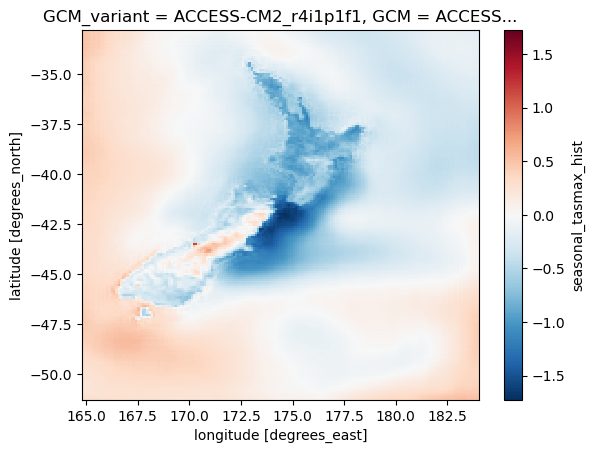

In [9]:
(All_merged.seasonal_tasmax_hist.isel(GCM_variant =0).isel(season =0)-All_merged_CCAM.seasonal_tasmax_hist.isel(GCM =0).isel(season =0)).plot()

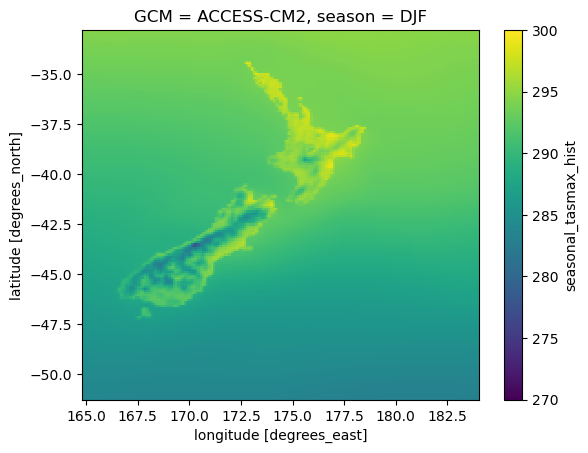

In [335]:
All_merged_CCAM.seasonal_tasmax_hist.isel(GCM =0).isel(season =0).plot(vmin =270, vmax =300)

In [5]:
All_merged_CCAM = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/CCAM_P_T_indicators.nc')

NameError: name 'xr' is not defined

# Potential to make Nature Climate Change paper
(a) Regional Climate Change signal (TXX vs CCAM), and then model uncertainty, vs internal variability uncertainty
(b) Show the plots at different regions. 
All_merged_CCAM

In [10]:
cc_signal_pr = 100 * (All_merged_CCAM.Rx1day.sel(year = slice(2080,2099)).mean("year") - All_merged_CCAM.Rx1day.sel(year = slice(1986,2005)).mean("year"))/All_merged_CCAM.Rx1day.sel(year = slice(1986,2005)).mean("year")
cc_signal_tasmax = (All_merged_CCAM.TXx.sel(year = slice(2080,2099)).mean("year") - All_merged_CCAM.TXx.sel(year = slice(1986,2005)).mean("year"))#/All_merged_CCAM.seasonal_pr_hist

In [11]:
cc_signal_pr_ai = 100 * (All_merged.Rx1day.sel(year = slice(2080,2099)).mean("year") - All_merged.Rx1day.sel(year = slice(1986,2005)).mean("year"))/All_merged.Rx1day.sel(year = slice(1986,2005)).mean("year")
cc_signal_tasmax_ai = (All_merged.TXx.sel(year = slice(2080,2099)).mean("year") - All_merged.TXx.sel(year = slice(1986,2005)).mean("year"))#/All_merged_CCAM.seasonal_pr_hist

In [872]:
All_merged_CCAM

<xarray.Dataset>
Dimensions:                 (GCM: 6, lon: 179, lat: 172, year: 141, season: 4)
Coordinates:
  * GCM                     (GCM) object 'ACCESS-CM2' ... 'NorESM2-MM'
  * lon                     (lon) float32 164.9 165.0 165.1 ... 183.9 184.0
  * lat                     (lat) float32 -51.21 -51.11 -51.0 ... -32.97 -32.86
  * year                    (year) int64 1960 1961 1962 1963 ... 2098 2099 2100
  * season                  (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    Rx1day                  (GCM, year, lat, lon) float64 ...
    seasonal_pr_future      (GCM, season, lat, lon) float32 ...
    seasonal_pr_hist        (GCM, season, lat, lon) float32 ...
    TXx                     (GCM, year, lat, lon) float32 ...
    seasonal_tasmax_future  (GCM, season, lat, lon) float32 ...
    seasonal_tasmax_hist    (GCM, season, lat, lon) float32 ...

In [12]:
cc_signal_pr_seasonal = 100*(All_merged_CCAM.seasonal_pr_future - All_merged_CCAM.seasonal_pr_hist)/ All_merged_CCAM.seasonal_pr_hist
cc_signal_tasmax_seasonal = (All_merged_CCAM.seasonal_tasmax_future - All_merged_CCAM.seasonal_tasmax_hist)

In [13]:
cc_signal_pr_seasonal_ai = 100*(All_merged.seasonal_pr_future - All_merged.seasonal_pr_hist)/ All_merged.seasonal_pr_hist
cc_signal_tasmax_seasonal_ai = (All_merged.seasonal_tasmax_future - All_merged.seasonal_tasmax_hist)

In [323]:
signal_error_true = cc_signal_tasmax.interp(lat =-43.5950, lon =170.1418, method ='nearest') - cc_signal_tasmax.mean(["lat","lon"])

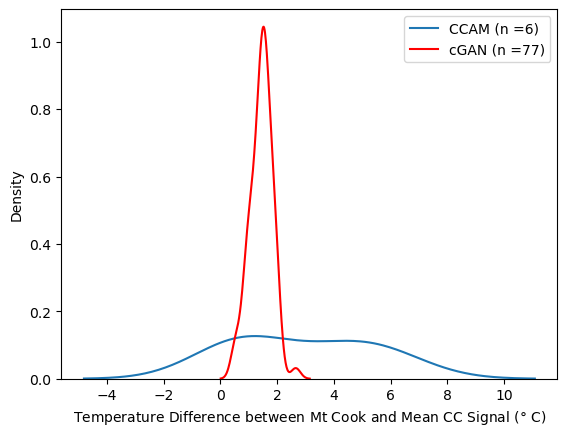

In [416]:
fig, ax = plt.subplots()
sns.kdeplot(signal_error_true, label = 'CCAM (n =6)')
sns.kdeplot(signal_error, color ='r', label = 'cGAN (n =77)')
ax.set_xlabel('Temperature Difference between Mt Cook and Mean CC Signal ($\degree$ C)')
ax.legend()

In [317]:
signal_error_true

<xarray.DataArray 'TXx' (GCM: 6)>
array([4.066327 , 6.2998595, 8.264595 , 2.5714114, 6.2300525, 5.285619 ],
      dtype=float32)
Coordinates:
  * GCM      (GCM) object 'ACCESS-CM2' 'AWI-CM-1-1-MR' ... 'NorESM2-MM'

In [316]:
signal_error

<xarray.DataArray 'TXx' (GCM_variant: 77)>
array([2.62136826, 2.8731016 , 3.66203769, 3.24878614, 3.24338504,
       2.86760583, 2.81677695, 2.78596967, 3.69753929, 3.68941802,
       1.99191994, 2.72918799, 3.25146975, 2.33653302, 3.18695935,
       3.05375518, 3.46932479, 2.52514806, 2.46159713, 2.37148019,
       3.13097281, 3.16810617, 2.33140439, 2.41089599, 2.56616831,
       3.23179703, 2.66318114, 3.26985852, 3.43866731, 2.54033817,
       2.86459638, 2.93411988, 2.31917334, 2.98241536, 2.95355662,
       2.94732427, 3.4831506 , 2.2217023 , 2.53797583, 3.06270844,
       3.16253628, 2.32614559, 2.02153523, 2.42074262, 2.70075638,
       3.15629286, 2.73816112, 2.96676642, 2.58630359, 2.69415325,
       2.63266126, 2.61492759, 2.09609401, 2.32654353, 2.67912122,
       3.2322905 , 2.92634172, 2.68708188, 2.98826071, 2.78598804,
       2.46944221, 3.58352028, 2.47702452, 2.80935258, 1.86265191,
       2.54181119, 1.99902816, 2.35580174, 1.37521825, 2.32724107,
       3.07748948, 1.6534553 , 3.4327062 , 2.71357042, 1.77293394,
       2.3500766 , 3.66261667])
Coordinates:
  * GCM_variant  (GCM_variant) <U25 'ACCESS-CM2_r4i1p1f1' ... 'UKESM1-0-LL_r1...
    GCM          (GCM_variant) <U16 'ACCESS-CM2' ... 'UKESM1-0-LL'

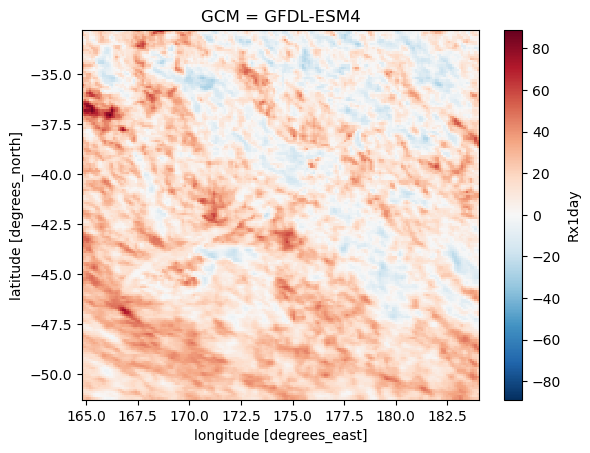

In [154]:
cc_signal_pr.isel(GCM =4).plot()

In [15]:
static_fields = xr.open_dataset(r'/nesi/project/niwa03712/group_shared/Emulator_training_data/ERA5_eval_ccam_12km.198110_NZ_Invariant.nc')

In [16]:
cc_signal_tasmax_land = cc_signal_tasmax.where(static_fields.orog >0.0, np.nan).mean(["lat","lon"])

In [17]:
cc_signal_tasmax_land_seasonal = cc_signal_tasmax_seasonal.where(static_fields.orog >0.0, np.nan).mean(["lat","lon"])

In [18]:
cc_signal_pr_land = cc_signal_pr.where(static_fields.orog >0.0, np.nan).mean(["lat","lon"])

In [19]:
cc_signal_pr_land_seasonal = cc_signal_pr_seasonal.where(static_fields.orog >0.0, np.nan).mean(["lat","lon"])

In [20]:
cc_signal_tasmax_land_ai = cc_signal_tasmax_ai.where(static_fields.orog >0.0, np.nan).mean(["lat","lon"])

In [21]:
cc_signal_tasmax_land_seasonal_ai = cc_signal_tasmax_seasonal_ai.where(static_fields.orog >0.0, np.nan).mean(["lat","lon"])

In [22]:
cc_signal_tasmax_land_ai = cc_signal_tasmax_ai.where(static_fields.orog >0.0, np.nan).mean(["lat","lon"])

In [23]:
cc_signal_pr_land_ai = cc_signal_pr_ai.where(static_fields.orog >0.0, np.nan).mean(["lat","lon"])

In [24]:
cc_signal_pr_land_seasonal_ai = cc_signal_pr_seasonal_ai.where(static_fields.orog >0.0, np.nan).mean(["lat","lon"])

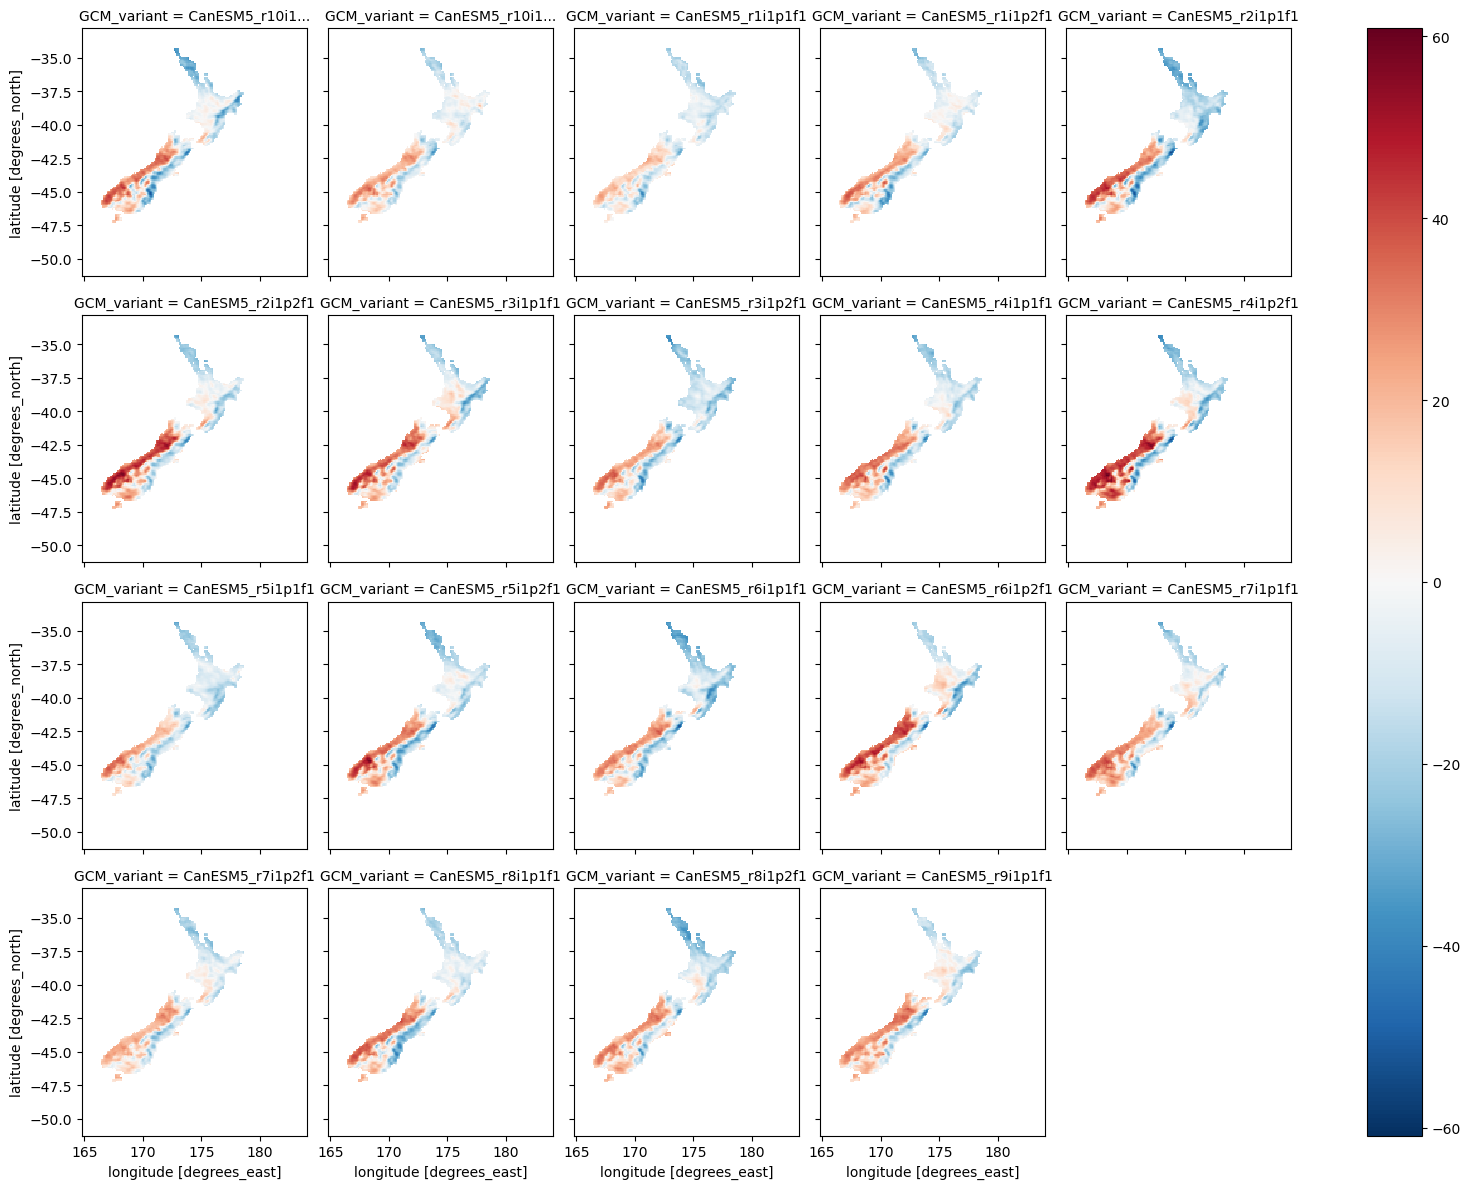

In [25]:
cc_signal_pr_seasonal_ai.sel(season ='JJA').where(static_fields.orog >0.0, np.nan).sel(GCM_variant = (cc_signal_pr_land_ai.GCM == 'CanESM5')).plot(col ="GCM_variant", col_wrap=5)

In [26]:
subset_gcm_pr_ai = cc_signal_pr_land_ai.sel(GCM_variant = ~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_ai.GCM == 'CanESM5')))
subset_gcm_tasmax_ai = cc_signal_tasmax_land_ai.sel(GCM_variant = ~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_ai.GCM == 'CanESM5')))

In [27]:
subset_gcm_pr_seasonal_ai = cc_signal_pr_land_seasonal_ai.sel(GCM_variant = ~((cc_signal_pr_land_seasonal_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_seasonal_ai.GCM == 'CanESM5')))
subset_gcm_tasmax_seasonal_ai = cc_signal_tasmax_land_seasonal_ai.sel(GCM_variant = ~((cc_signal_pr_land_seasonal_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_seasonal_ai.GCM == 'CanESM5')))

In [28]:
subset_gcm_pr_ai_inta = cc_signal_pr_land_ai.sel(GCM_variant = (cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5'))
subset_gcm_tasmax_ai_inta = cc_signal_tasmax_land_ai.sel(GCM_variant = (cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5'))

In [29]:
subset_gcm_pr_ai_seasonal_inta = cc_signal_pr_land_seasonal_ai.sel(GCM_variant = (cc_signal_pr_land_seasonal_ai.GCM == 'ACCESS-ESM1-5'))
subset_gcm_tasmax_ai_seasonal_inta = cc_signal_tasmax_land_seasonal_ai.sel(GCM_variant = (cc_signal_pr_land_seasonal_ai.GCM == 'ACCESS-ESM1-5'))

In [30]:
subset_gcm_pr_ai_intc = cc_signal_pr_land_ai.sel(GCM_variant = (cc_signal_pr_land_ai.GCM == 'CanESM5'))
subset_gcm_tasmax_ai_intc = cc_signal_tasmax_land_ai.sel(GCM_variant = (cc_signal_pr_land_ai.GCM == 'CanESM5'))

In [31]:
subset_gcm_pr_ai_seasonal_intc = cc_signal_pr_land_seasonal_ai.sel(GCM_variant = (cc_signal_pr_land_seasonal_ai.GCM == 'CanESM5'))
subset_gcm_tasmax_ai_seasonal_intc = cc_signal_tasmax_land_seasonal_ai.sel(GCM_variant = (cc_signal_pr_land_seasonal_ai.GCM == 'CanESM5'))

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/tmp/ipykernel_37614/3050895880.py:47: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset_gcm_tasmax_ai.values.ravel(), ax=y_inset, color='orange', alpha=0.25, fill=True, vertical=True)
/tmp/ipykernel_37614/3050895880.py:49: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset_gcm_tasmax_ai_inta.values.ravel(), ax=y_inset, color='cornflowerblue', alpha=0.25, fill=True, vertical=True)
/tmp/ipykernel_37614/3050895880.py:50: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code

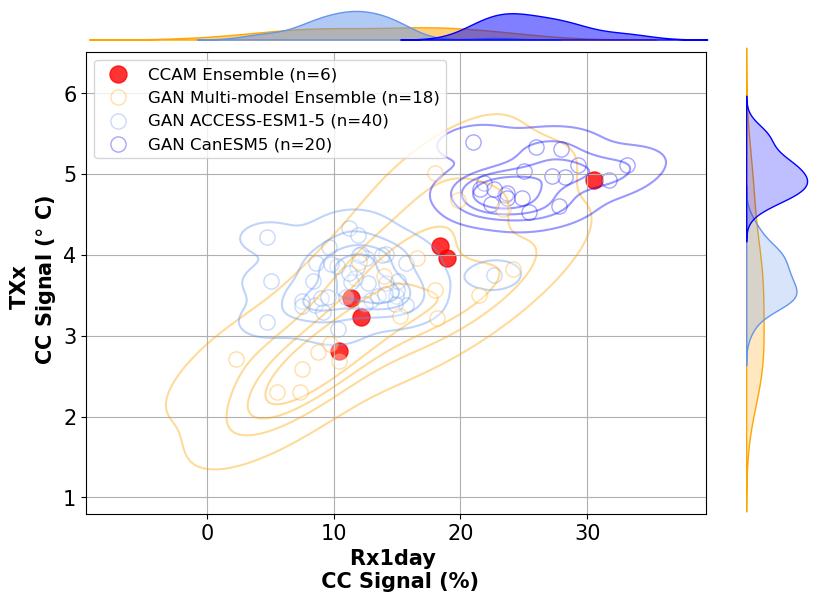

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dummy data (Replace these with your actual 1D arrays)
# cc_signal_pr_land = np.random.normal(15, 5, 10)
# cc_signal_tasmax_land = np.random.normal(3.5, 0.5, 10)

# subset_gcm_pr_ai = np.random.normal(10, 5, 40)
# subset_gcm_tasmax_ai = np.random.normal(3.2, 0.4, 40)

# subset_gcm_pr_ai_inta = np.random.normal(13, 4, 50)
# subset_gcm_tasmax_ai_inta = np.random.normal(3.8, 0.5, 50)

# subset_gcm_pr_ai_intc = np.random.normal(25, 4, 30)
# subset_gcm_tasmax_ai_intc = np.random.normal(5.0, 0.3, 30)

# Create main figure
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter Plots
ax.scatter(cc_signal_pr_land, cc_signal_tasmax_land, marker='o', color='r', s=150, alpha =0.8, label = 'CCAM Ensemble (n=6)')
ax.scatter(subset_gcm_pr_ai, subset_gcm_tasmax_ai, marker='o', color='orange', fc='white', s=120,alpha =0.35, zorder =3, label ='GAN Multi-model Ensemble (n=18)')
ax.scatter(subset_gcm_pr_ai_inta, subset_gcm_tasmax_ai_inta, marker='o', color='cornflowerblue', fc='white', s=120,alpha =0.35, label ='GAN ACCESS-ESM1-5 (n=40)')
ax.scatter(subset_gcm_pr_ai_intc, subset_gcm_tasmax_ai_intc, marker='o', color='blue', fc='white', s=120,alpha =0.35, label ='GAN CanESM5 (n=20)')

# Density Contours (Light)
sns.kdeplot(x=subset_gcm_pr_ai, y=subset_gcm_tasmax_ai, ax=ax, levels=5, color='orange', alpha=0.4)
sns.kdeplot(x=subset_gcm_pr_ai_inta, y=subset_gcm_tasmax_ai_inta, ax=ax, levels=5, color='cornflowerblue', alpha=0.4)
sns.kdeplot(x=subset_gcm_pr_ai_intc, y=subset_gcm_tasmax_ai_intc, ax=ax, levels=5, color='blue', alpha=0.4)

# Marginal Density Plots as Insets
x_inset = fig.add_axes([0.09, 0.9, 0.85, 0.05])  # x-axis inset
y_inset = fig.add_axes([0.95, 0.075, 0.08, 0.85])  # y-axis inset

# X Density Plot
sns.kdeplot(subset_gcm_pr_ai.values.ravel(), ax=x_inset, color='orange', alpha=0.5, fill=True)
sns.kdeplot(subset_gcm_pr_ai_inta.values.ravel(), ax=x_inset, color='cornflowerblue', alpha=0.5, fill=True)
#sns.kdeplot(cc_signal_pr_land, ax=x_inset, color='r', alpha=0.25, fill=True)
sns.kdeplot(subset_gcm_pr_ai_intc.values.ravel(), ax=x_inset, color='blue', alpha=0.5, fill=True)
x_inset.set_xticks([])
x_inset.set_yticks([])
x_inset.set_frame_on(False)

# Y Density Plot

sns.kdeplot(subset_gcm_tasmax_ai.values.ravel(), ax=y_inset, color='orange', alpha=0.25, fill=True, vertical=True)
#sns.kdeplot(cc_signal_tasmax_land, ax=y_inset, color='r', alpha=0.25, fill=True, vertical=True)
sns.kdeplot(subset_gcm_tasmax_ai_inta.values.ravel(), ax=y_inset, color='cornflowerblue', alpha=0.25, fill=True, vertical=True)
sns.kdeplot(subset_gcm_tasmax_ai_intc.values.ravel(), ax=y_inset, color='blue', alpha=0.25, fill=True, vertical=True)
y_inset.set_xticks([])
y_inset.set_yticks([])
y_inset.set_frame_on(False)
y_inset.set_xlabel(' ')
x_inset.set_ylabel(' ')
y_inset.set_xlabel(' ')
x_inset.set_ylabel(' ')
# Show plot
ax.set_ylabel('TXx \n CC Signal ($\degree$ C)', weight ='bold', fontsize =15)
ax.set_xlabel('Rx1day \n CC Signal (%)', weight ='bold', fontsize =15)
ax.grid('on')
ax.tick_params(labelsize =15)
ax.legend(loc=2, fontsize =12
         
         )
plt.show()
#fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/TXX_RX1day_joint_space.png', dpi =500, bbox_inches ='tight')
#fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/TXX_RX1day_joint_space.pdf', dpi =500, bbox_inches ='tight')


In [891]:
cc_signal_pr_land_seasonal.sel(season ='DJF')

<xarray.DataArray (GCM: 6)>
array([ 4.9446297,  3.5639973, -7.970727 , -2.9371455, -6.6435747,
        2.948425 ], dtype=float32)
Coordinates:
  * GCM      (GCM) object 'ACCESS-CM2' 'AWI-CM-1-1-MR' ... 'NorESM2-MM'
    season   <U3 'DJF'

/tmp/ipykernel_428168/902607425.py:65: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset_gcm_tasmax_ai.values.ravel(), ax=y_inset, color='orange', alpha=0.25, fill=True, vertical=True)
/tmp/ipykernel_428168/902607425.py:67: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset_gcm_tasmax_ai_inta.values.ravel(), ax=y_inset, color='cornflowerblue', alpha=0.25, fill=True, vertical=True)
/tmp/ipykernel_428168/902607425.py:68: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset_gcm_tasmax_ai_intc.values.ravel(), ax=y_inset, color='blue', alpha=0.25, fill=True, vertical=True)
/tmp/ipykernel_428168/902607425.py:120: UserWarning: 

The `vertic

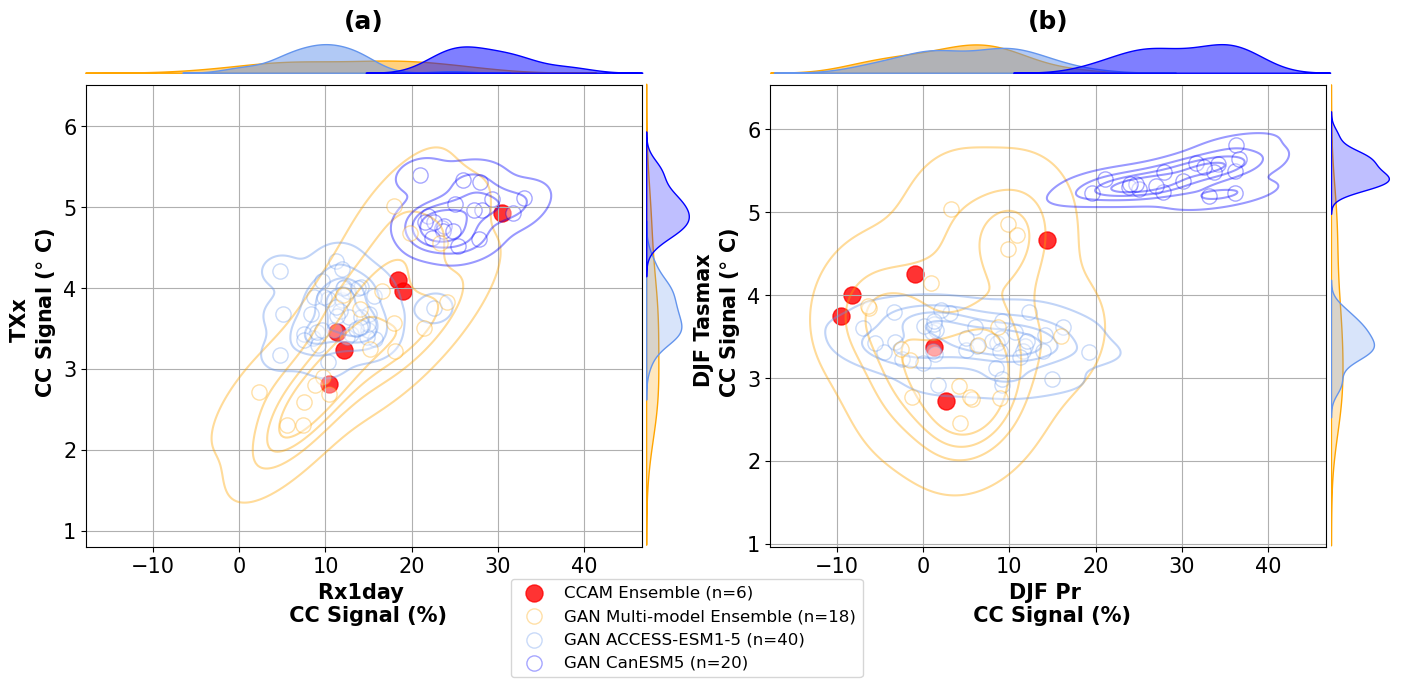

In [1206]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dummy data (Replace these with your actual 1D arrays)
# cc_signal_pr_land = np.random.normal(15, 5, 10)
# cc_signal_tasmax_land = np.random.normal(3.5, 0.5, 10)

# subset_gcm_pr_ai = np.random.normal(10, 5, 40)
# subset_gcm_tasmax_ai = np.random.normal(3.2, 0.4, 40)

# subset_gcm_pr_ai_inta = np.random.normal(13, 4, 50)
# subset_gcm_tasmax_ai_inta = np.random.normal(3.8, 0.5, 50)

# subset_gcm_pr_ai_intc = np.random.normal(25, 4, 30)
# subset_gcm_tasmax_ai_intc = np.random.normal(5.0, 0.3, 30)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dummy data (Replace these with your actual 1D arrays)
# cc_signal_pr_land = np.random.normal(15, 5, 10)
# cc_signal_tasmax_land = np.random.normal(3.5, 0.5, 10)

# subset_gcm_pr_ai = np.random.normal(10, 5, 40)
# subset_gcm_tasmax_ai = np.random.normal(3.2, 0.4, 40)

# subset_gcm_pr_ai_inta = np.random.normal(13, 4, 50)
# subset_gcm_tasmax_ai_inta = np.random.normal(3.8, 0.5, 50)

# subset_gcm_pr_ai_intc = np.random.normal(25, 4, 30)
# subset_gcm_tasmax_ai_intc = np.random.normal(5.0, 0.3, 30)

# Create main figure
fig, axes = plt.subplots(1,2, figsize=(16, 6), sharex=True)
ax = axes[0]
# Scatter Plots
ax.scatter(cc_signal_pr_land, cc_signal_tasmax_land, marker='o', color='r', s=150, alpha =0.8, label = 'CCAM Ensemble (n=6)')
ax.scatter(subset_gcm_pr_ai, subset_gcm_tasmax_ai, marker='o', color='orange', fc='white', s=120,alpha =0.35, zorder =3, label ='GAN Multi-model Ensemble (n=18)')
ax.scatter(subset_gcm_pr_ai_inta, subset_gcm_tasmax_ai_inta, marker='o', color='cornflowerblue', fc='white', s=120,alpha =0.35, label ='GAN ACCESS-ESM1-5 (n=40)')
ax.scatter(subset_gcm_pr_ai_intc, subset_gcm_tasmax_ai_intc, marker='o', color='blue', fc='white', s=120,alpha =0.35, label ='GAN CanESM5 (n=20)')

# Density Contours (Light)
sns.kdeplot(x=subset_gcm_pr_ai, y=subset_gcm_tasmax_ai, ax=ax, levels=5, color='orange', alpha=0.4)
sns.kdeplot(x=subset_gcm_pr_ai_inta, y=subset_gcm_tasmax_ai_inta, ax=ax, levels=5, color='cornflowerblue', alpha=0.4)
sns.kdeplot(x=subset_gcm_pr_ai_intc, y=subset_gcm_tasmax_ai_intc, ax=ax, levels=5, color='blue', alpha=0.4)

# Marginal Density Plots as Insets
x_inset = fig.add_axes([0.107, 0.9, 0.383, 0.05])  # x-axis inset
y_inset = fig.add_axes([0.475, 0.075, 0.028, 0.845])  # y-axis inset

# X Density Plot
sns.kdeplot(subset_gcm_pr_ai.values.ravel(), ax=x_inset, color='orange', alpha=0.5, fill=True)
sns.kdeplot(subset_gcm_pr_ai_inta.values.ravel(), ax=x_inset, color='cornflowerblue', alpha=0.5, fill=True)
#sns.kdeplot(cc_signal_pr_land, ax=x_inset, color='r', alpha=0.25, fill=True)
sns.kdeplot(subset_gcm_pr_ai_intc.values.ravel(), ax=x_inset, color='blue', alpha=0.5, fill=True)
x_inset.set_xticks([])
x_inset.set_yticks([])
x_inset.set_frame_on(False)

# Y Density Plot

sns.kdeplot(subset_gcm_tasmax_ai.values.ravel(), ax=y_inset, color='orange', alpha=0.25, fill=True, vertical=True)
#sns.kdeplot(cc_signal_tasmax_land, ax=y_inset, color='r', alpha=0.25, fill=True, vertical=True)
sns.kdeplot(subset_gcm_tasmax_ai_inta.values.ravel(), ax=y_inset, color='cornflowerblue', alpha=0.25, fill=True, vertical=True)
sns.kdeplot(subset_gcm_tasmax_ai_intc.values.ravel(), ax=y_inset, color='blue', alpha=0.25, fill=True, vertical=True)
y_inset.set_xticks([])
y_inset.set_yticks([])
y_inset.set_frame_on(False)
y_inset.set_xlabel(' ')
x_inset.set_ylabel(' ')
y_inset.set_xlabel(' ')
x_inset.set_ylabel(' ')
# Show plot
ax.set_ylabel('TXx \n CC Signal ($\degree$ C)', weight ='bold', fontsize =15)
ax.set_xlabel('Rx1day \n CC Signal (%)', weight ='bold', fontsize =15)
ax.grid('on')
ax.tick_params(labelsize =15)
# ax.legend(loc=2, fontsize =12
         
#          )
# plt.show()
# fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/TXX_RX1day_joint_space.png', dpi =500, bbox_inches ='tight')
# fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/TXX_RX1day_joint_space.pdf', dpi =500, bbox_inches ='tight')


ax = axes[1]

# Create main figure
# fig, ax = plt.subplots(figsize=(8, 6))
season ='DJF'
# Scatter Plots
ax.scatter(cc_signal_pr_land_seasonal.sel(season =season), cc_signal_tasmax_land_seasonal.sel(season =season), marker='o', color='r', s=150, alpha =0.8, label = 'CCAM Ensemble (n=6)')
ax.scatter(subset_gcm_pr_seasonal_ai.sel(season =season), subset_gcm_tasmax_seasonal_ai.sel(season =season), marker='o', color='orange', fc='white', s=120,alpha =0.35, zorder =3, label ='GAN Multi-model Ensemble (n=18)')
ax.scatter(subset_gcm_pr_ai_seasonal_inta.sel(season =season), subset_gcm_tasmax_ai_seasonal_inta.sel(season =season), marker='o', color='cornflowerblue', fc='white', s=120,alpha =0.35, label ='GAN ACCESS-ESM1-5 (n=40)')
ax.scatter(subset_gcm_pr_ai_seasonal_intc.sel(season =season), subset_gcm_tasmax_ai_seasonal_intc.sel(season =season), marker='o', color='blue', fc='white', s=120,alpha =0.35, label ='GAN CanESM5 (n=20)')

# Density Contours (Light)
sns.kdeplot(x=subset_gcm_pr_seasonal_ai.sel(season =season), y=subset_gcm_tasmax_seasonal_ai.sel(season =season), ax=ax, levels=5, color='orange', alpha=0.4)
sns.kdeplot(x=subset_gcm_pr_ai_seasonal_inta.sel(season =season), y=subset_gcm_tasmax_ai_seasonal_inta.sel(season =season), ax=ax, levels=5, color='cornflowerblue', alpha=0.4)
sns.kdeplot(x=subset_gcm_pr_ai_seasonal_intc.sel(season =season), y=subset_gcm_tasmax_ai_seasonal_intc.sel(season =season), ax=ax, levels=5, color='blue', alpha=0.4)

# Marginal Density Plots as Insets
x_inset = fig.add_axes([0.535, 0.9, 0.385, 0.05])  # x-axis inset
y_inset = fig.add_axes([0.903, 0.074, 0.038, 0.845])  # y-axis inset

# X Density Plot
sns.kdeplot(subset_gcm_pr_seasonal_ai.sel(season =season).values.ravel(), ax=x_inset, color='orange', alpha=0.5, fill=True)
sns.kdeplot(subset_gcm_pr_ai_seasonal_inta.sel(season =season).values.ravel(), ax=x_inset, color='cornflowerblue', alpha=0.5, fill=True)
#sns.kdeplot(cc_signal_pr_land, ax=x_inset, color='r', alpha=0.25, fill=True)
sns.kdeplot(subset_gcm_pr_ai_seasonal_intc.sel(season =season).values.ravel(), ax=x_inset, color='blue', alpha=0.5, fill=True)
x_inset.set_xticks([])
x_inset.set_yticks([])
x_inset.set_frame_on(False)

# Y Density Plot

sns.kdeplot(subset_gcm_tasmax_seasonal_ai.sel(season =season).values.ravel(), ax=y_inset, color='orange', alpha=0.25, fill=True, vertical=True)
#sns.kdeplot(cc_signal_tasmax_land, ax=y_inset, color='r', alpha=0.25, fill=True, vertical=True)
sns.kdeplot(subset_gcm_tasmax_ai_seasonal_inta.sel(season =season).values.ravel(), ax=y_inset, color='cornflowerblue', alpha=0.25, fill=True, vertical=True)
sns.kdeplot(subset_gcm_tasmax_ai_seasonal_intc.sel(season =season).values.ravel(), ax=y_inset, color='blue', alpha=0.25, fill=True, vertical=True)
y_inset.set_xticks([])
y_inset.set_yticks([])
y_inset.set_frame_on(False)

# Show plot
ax.set_ylabel('DJF Tasmax \n CC Signal ($\degree$ C)', weight ='bold', fontsize =15)
ax.set_xlabel('DJF Pr \n CC Signal (%)', weight ='bold', fontsize =15)
ax.grid('on')
ax.tick_params(labelsize =15)
ax.legend(loc=8, fontsize =12, bbox_to_anchor = (-0.15, -0.3)
         
         )

y_inset.set_xlabel(' ')
x_inset.set_ylabel(' ')
y_inset.set_xlabel(' ')
x_inset.set_ylabel(' ')
#fig.legend(legend, handles)
plt.subplots_adjust(wspace=0.23, hspace=0.15)
axes[0].set_title('(a)', fontsize =18, pad =40.5, weight ='bold')
axes[1].set_title('(b)', fontsize =18, pad =40.5, weight ='bold')
plt.show()
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/TXX_RX1day_joint_space.png', dpi =500, bbox_inches ='tight')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/TXX_RX1day_joint_space.pdf', dpi =500, bbox_inches ='tight')


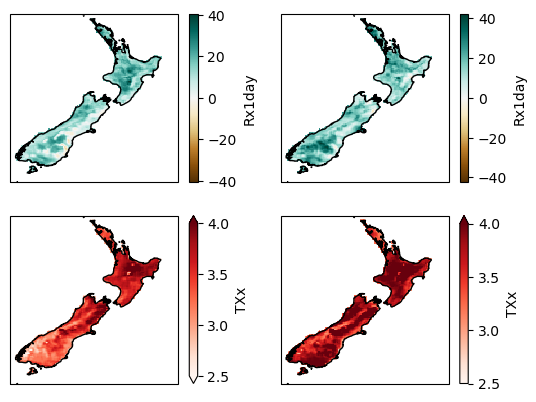

In [393]:
fig, ax = plt.subplots(2,2, subplot_kw = dict(projection = ccrs.PlateCarree(central_longitude =171.77)), sharex =True, sharey =True)
cc_signal_pr_ai.where(static_fields.orog >0).sel(GCM_variant=~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_ai.GCM == 'CanESM5'))).mean(["GCM_variant"]).plot(ax=ax[0,0], transform = ccrs.PlateCarree(), cmap ='BrBG')
cc_signal_pr.where(static_fields.orog >0).mean(["GCM"]).plot(ax=ax[0,1], transform = ccrs.PlateCarree(), cmap ='BrBG')

cc_signal_tasmax_ai.where(static_fields.orog >0).sel(GCM_variant=~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_ai.GCM == 'CanESM5'))).mean(["GCM_variant"]).plot(ax=ax[1,0], transform = ccrs.PlateCarree(), cmap ='Reds', vmax =4.0, vmin =2.5)
cc_signal_tasmax.where(static_fields.orog >0).mean(["GCM"]).plot(ax=ax[1,1], transform = ccrs.PlateCarree(), vmax =4.0, cmap ='Reds', vmin =2.5)
ax[0,0].set_extent([166, 180, -48, -34], crs = ccrs.PlateCarree())
ax[0,0].coastlines('10m')
ax[1,0].coastlines('10m')
ax[0,1].coastlines('10m')
ax[1,1].coastlines('10m')



In [2]:
cc_signal_pr_ai

NameError: name 'cc_signal_pr_ai' is not defined

In [663]:
cc_signal_pr.interp(lat =-39, lon =176).max() - cc_signal_pr.interp(lat =-39, lon =176).std()

<xarray.DataArray 'Rx1day' ()>
array(22.07417021)
Coordinates:
    lat      int64 -39
    lon      int64 176

In [664]:
cc_signal_pr_ai.interp(lat =-39, lon =176).sel(GCM_variant=(cc_signal_pr_land_ai.GCM == 'CanESM5')).std()

<xarray.DataArray 'Rx1day' ()>
array(13.51191108)
Coordinates:
    lat      int64 -39
    lon      int64 176

<AxesSubplot:ylabel='Density'>

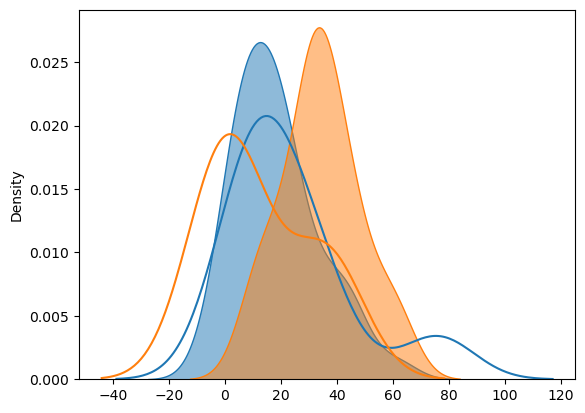

In [483]:
fig, ax = plt.subplots()
sns.kdeplot(cc_signal_pr_ai.interp(lat =-39, lon =176).sel(GCM_variant=~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_ai.GCM == 'CanESM5'))), ax=ax)
sns.kdeplot(cc_signal_pr_ai.interp(lat =-39, lon =176).sel(GCM_variant=(cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')), ax=ax, fill =True, alpha =0.5)
sns.kdeplot(cc_signal_pr_ai.interp(lat =-39, lon =176).sel(GCM_variant=(cc_signal_pr_land_ai.GCM == 'CanESM5')), ax=ax, fill =True, alpha =0.5)
sns.kdeplot(cc_signal_pr.interp(lat =-39, lon =176), ax=ax)

In [528]:
df = pd.DataFrame()
df.loc[:len(cc_signal_pr_ai.interp(lat=-39, lon=176)), 'Large Ensemble'] = cc_signal_pr_ai.interp(lat=-39, lon=176).values.flatten()
df.loc[:len(cc_signal_pr_ai.interp(lat=-39, lon=176).sel(GCM_variant=(cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')).values.flatten())-1, 'ACCESS-ESM1-5'] = cc_signal_pr_ai.interp(lat=-39, lon=176) .sel(GCM_variant=(cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')).values.flatten()
ARR = cc_signal_pr_ai.interp(lat=-39, lon=176).sel(GCM_variant=~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5') | (cc_signal_pr_land_ai.GCM == 'CanESM5'))).values.flatten()
df.loc[:, "All GCMs (except ACCESS-ESM1-5 & CanESM5)"] =np.nan
df.loc[:, "All GCMs (except ACCESS-ESM1-5 & CanESM5)"].iloc[:len(ARR)] = ARR
ARR2 =cc_signal_pr_ai.interp(lat=-39, lon=176).sel(GCM_variant=(cc_signal_pr_land_ai.GCM == 'CanESM5')).values.flatten()
df.loc[:len(ARR2)-1, 'CanESM5'] = ARR2
ARR2 =cc_signal_pr.interp(lat=-39, lon=176).values.flatten()
df.loc[:len(ARR2)-1, 'CCAM'] = ARR2

#ARR = cc_signal_pr_ai.interp(lat=-39, lon=176).sel(GCM_variant=~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5') | (cc_signal_pr_land_ai.GCM == 'CanESM5'))).values.flatten()

/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [529]:
df

Large Ensemble  ACCESS-ESM1-5  All GCMs (except ACCESS-ESM1-5 & CanESM5)  \
0         2.737404       8.772479                                   2.737404   
1         8.772479      39.995505                                  24.555876   
2        39.995505      -1.784867                                  10.141292   
3        -1.784867       2.682204                                  37.834242   
4         2.682204      33.427733                                  30.722301   
..             ...            ...                                        ...   
72       21.702941            NaN                                        NaN   
73       13.444514            NaN                                        NaN   
74       13.640198            NaN                                        NaN   
75       36.364803            NaN                                        NaN   
76        7.672921            NaN                                        NaN   

      CanESM5       CCAM  
0   47.216228  33.178215  
1   60.850805  39.140095  
2   37.834938   5.034252  
3   30.301071  -2.545357  
4   30.671692  -4.751006  
..        ...        ...  
72        NaN        NaN  
73        NaN        NaN  
74        NaN        NaN  
75        NaN        NaN  
76        NaN        NaN  

[77 rows x 5 columns]

In [1218]:
regions = {'Auckland': (-36.7928, 174.6131),
 'Tauranga': (-37.6870, 176.1654),
 'New Plymouth': (-39.0572, 174.0794),
 'Nelson': (-41.2732,  173.2854),
 'Christchurch': (-43.5320, 172.6366),
 'Milford Sound': (-44.6414, 167.8974),
 'Napier': (-39.4893, 176.9192)}

regions = {'Auckland': (-36.7928, 174.6131),
 'Wellington': (-41.2924, 174.7787),
 'Christchurch': (-43.5320, 172.6366),
 'Milford Sound': (-44.6414, 167.8974)}

offsets = {'Auckland': (0.1, -0.2),
 'Tauranga': (0.07, 0.025),
 'New Plymouth': (0.05, -0.15),
 'Nelson': (0.0,  -0.15),
 'Christchurch': (-0.12, 0.13),
 'Milford Sound': (0.08, -0.05),
 'Napier': (-0.17, 0.02)}

offsets = {'Auckland': (0.1, -0.02),
 'Tauranga': (0.07, 0.025),
 'Wellington': (0.0, -0.32),
 'Nelson': (0.0,  -0.15),
 'Christchurch': (-0.22, 0.15),
 'Milford Sound': (-0.3, -0.03),
 'Napier': (-0.17, 0.02)}

offset_lon = [-0.25,0.15,-0.15, -0.25, -0.35, +0.25, 0.00]
offset_lat = [0,0,0.0, -0.15,0,0,-0.15]
#offset_lat = [0.0,0.0 

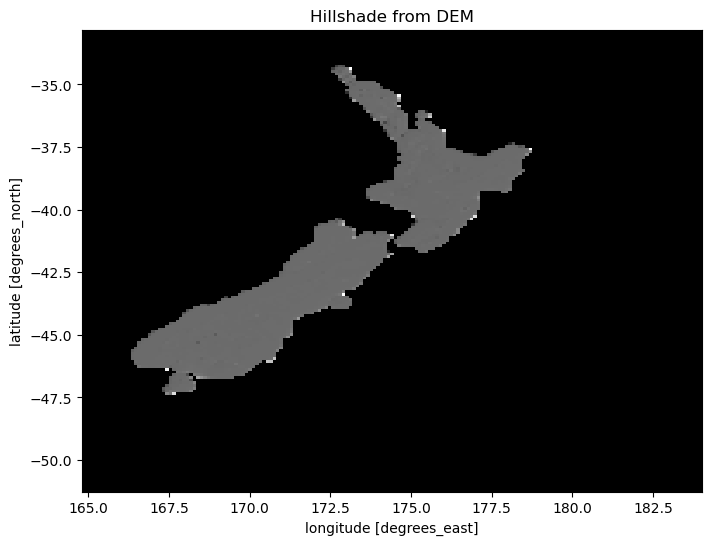

In [1065]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Assuming orog is your DEM stored in static_fields.orog
orog = static_fields.orog  # 2D xarray.DataArray of elevation

# Compute grid spacing (assumes lat/lon are coordinates)
lat, lon = orog.coords["lat"], orog.coords["lon"]
dy, dx = np.gradient(orog, lat, lon)  # Gradient along lat/lon

# Define sun position for shading
azimuth = 315  # NW sun direction
altitude = 45  # Sun elevation angle

# Convert angles to radians
azimuth_rad = np.radians(azimuth)
altitude_rad = np.radians(altitude)

# Compute slope and aspect
slope = np.arctan(np.sqrt(dx**2 + dy**2))
aspect = np.arctan2(-dy, -dx)

# Compute hillshade
hillshade = np.sin(altitude_rad) * np.sin(slope) + np.cos(altitude_rad) * np.cos(slope) * np.cos(azimuth_rad - aspect)

# Mask ocean areas (assuming NaNs in ocean)
hillshade = xr.where(np.isnan(orog), np.nan, hillshade)

# Normalize for better contrast
hillshade = (hillshade - hillshade.min()) / (hillshade.max() - hillshade.min())

# Plot with xarray
plt.figure(figsize=(8, 6))
hillshade.plot(cmap="gray", add_colorbar=False, vmin =0.8)
plt.title("Hillshade from DEM")
plt.show()


In [1077]:
import earthpy.spatial as es
hillshade_dset = xr.open_dataset(r'/nesi/project/niwa00018/gibsonp/dload_data/global_topo_1km/topo_NZ_1km.nc')
hillshade = es.hillshade(hillshade_dset.topo.values, azimuth=0, altitude=45)
hillshade_dset['hillshade'] = (('Y','X'), hillshade)

In [1127]:
hillshade_dset

<xarray.Dataset>
Dimensions:    (X: 1560, Y: 1680)
Coordinates:
  * X          (X) float32 166.0 166.0 166.0 166.0 ... 179.0 179.0 179.0 179.0
  * Y          (Y) float32 -33.5 -33.51 -33.52 -33.53 ... -47.48 -47.49 -47.5
Data variables:
    topo       (Y, X) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    hillshade  (Y, X) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Jun 22 14:22:26 2023: cdo sellonlatbox,166,179,-33.5,-4...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

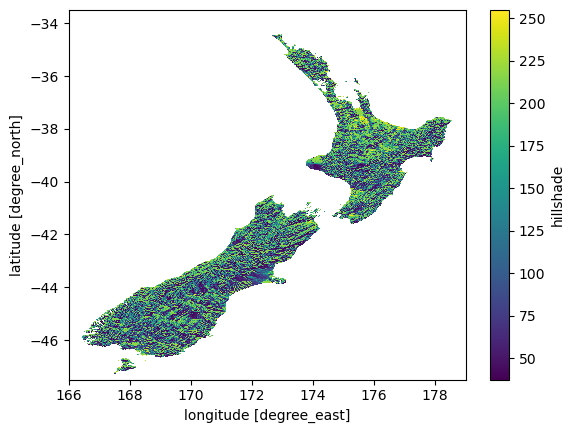

In [1136]:
hillshade_dset.hillshade.plot()

In [1038]:
np.nanmin(dx)

-658.35956

In [1033]:
hillshade

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [1031]:
static_fields.orog

<xarray.DataArray 'orog' (lat: 172, lon: 179)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float32 164.9 165.0 165.1 165.2 ... 183.6 183.7 183.9 184.0
  * lat      (lat) float32 -51.21 -51.11 -51.0 -50.89 ... -33.07 -32.97 -32.86
Attributes:
    long_name:      Surface height
    standard_name:  surface_altitude
    units:          m

In [1007]:
df = pd.DataFrame()
access_arr = cc_signal_pr_ai.interp(lat=lat, lon=lon).where(cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5', drop=True).values.flatten()
access_seasonal = cc_signal_pr_seasonal_ai.interp(lat=lat, lon=lon).sel(season = season).where(cc_signal_pr_land_seasonal_ai.GCM == 'ACCESS-ESM1-5', drop=True).values.flatten()
df.loc[:len(access_arr)-1, 'ACCESS-ESM1-5 (n=40)'] = access_arr
df1 = pd.DataFrame()
df1.loc[:len(access_seasonal)-1  , 'ACCESS-ESM1-5 (n=40)'] = access_seasonal
df1['Metric'] = 'DJF'
df['Metric'] = 'Rx1day'

/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [1011]:
df.melt(var_name="GCM Variant", value_name="Rx1Day CC Signal", id_vars=["Metric"])

Metric           GCM Variant  Rx1Day CC Signal
0   Rx1day  ACCESS-ESM1-5 (n=40)          8.772479
1   Rx1day  ACCESS-ESM1-5 (n=40)         39.995505
2   Rx1day  ACCESS-ESM1-5 (n=40)         -1.784867
3   Rx1day  ACCESS-ESM1-5 (n=40)          2.682204
4   Rx1day  ACCESS-ESM1-5 (n=40)         33.427733
5   Rx1day  ACCESS-ESM1-5 (n=40)         44.851763
6   Rx1day  ACCESS-ESM1-5 (n=40)          5.133771
7   Rx1day  ACCESS-ESM1-5 (n=40)         28.624769
8   Rx1day  ACCESS-ESM1-5 (n=40)          2.126692
9   Rx1day  ACCESS-ESM1-5 (n=40)         16.617451
10  Rx1day  ACCESS-ESM1-5 (n=40)         12.892009
11  Rx1day  ACCESS-ESM1-5 (n=40)          8.137245
12  Rx1day  ACCESS-ESM1-5 (n=40)         18.631001
13  Rx1day  ACCESS-ESM1-5 (n=40)         16.055301
14  Rx1day  ACCESS-ESM1-5 (n=40)         39.125956
15  Rx1day  ACCESS-ESM1-5 (n=40)         19.512543
16  Rx1day  ACCESS-ESM1-5 (n=40)          9.842232
17  Rx1day  ACCESS-ESM1-5 (n=40)         44.780150
18  Rx1day  ACCESS-ESM1-5 (n=40)         19.752308
19  Rx1day  ACCESS-ESM1-5 (n=40)         20.347607
20  Rx1day  ACCESS-ESM1-5 (n=40)          5.794326
21  Rx1day  ACCESS-ESM1-5 (n=40)         27.024124
22  Rx1day  ACCESS-ESM1-5 (n=40)          7.873144
23  Rx1day  ACCESS-ESM1-5 (n=40)         16.225068
24  Rx1day  ACCESS-ESM1-5 (n=40)         16.298150
25  Rx1day  ACCESS-ESM1-5 (n=40)         30.733622
26  Rx1day  ACCESS-ESM1-5 (n=40)          0.198297
27  Rx1day  ACCESS-ESM1-5 (n=40)         22.957524
28  Rx1day  ACCESS-ESM1-5 (n=40)         18.468557
29  Rx1day  ACCESS-ESM1-5 (n=40)         61.317284
30  Rx1day  ACCESS-ESM1-5 (n=40)         46.381713
31  Rx1day  ACCESS-ESM1-5 (n=40)          8.899061
32  Rx1day  ACCESS-ESM1-5 (n=40)          2.386755
33  Rx1day  ACCESS-ESM1-5 (n=40)         26.966833
34  Rx1day  ACCESS-ESM1-5 (n=40)         -5.829302
35  Rx1day  ACCESS-ESM1-5 (n=40)          9.593484
36  Rx1day  ACCESS-ESM1-5 (n=40)         16.230785
37  Rx1day  ACCESS-ESM1-5 (n=40)         10.233424
38  Rx1day  ACCESS-ESM1-5 (n=40)         23.124812
39  Rx1day  ACCESS-ESM1-5 (n=40)          5.114246

In [1220]:
import numpy as np

def create_df(lat, lon, season ='DJF'):
    df1 = pd.DataFrame()
    # V1
    
    access_arr = cc_signal_pr_ai.interp(lat=lat, lon=lon).where(cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5', drop=True).values.flatten()
    df1.loc[:len(access_arr)-1, 'GAN ACCESS-ESM1-5 (n=40)'] = access_arr
    df1['Metric'] = 'Rx1day'
    df1 = df1.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    df2 = pd.DataFrame()
    #V2
    access_seasonal = cc_signal_pr_seasonal_ai.interp(lat=lat, lon=lon).sel(season = season).where(cc_signal_pr_land_seasonal_ai.GCM == 'ACCESS-ESM1-5', drop=True).values.flatten()
    df2.loc[:len(access_seasonal)-1  , 'GAN ACCESS-ESM1-5 (n=40)'] = access_seasonal
    df2['Metric'] = 'DJF Pr'
    df2 = df2.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    # V3
    df3 = pd.DataFrame()
    other_gcms = cc_signal_pr_ai.interp(lat=lat, lon=lon).where(
        ~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5') | (cc_signal_pr_land_ai.GCM == 'CanESM5')), drop=True
    ).values.flatten()
    df3.loc[:len(other_gcms)-1, "GAN Multi-model (n=18)"] = other_gcms
    df3['Metric'] = 'Rx1day'
    df3 = df3.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    # V4
    df4 = pd.DataFrame()
    other_gcms = cc_signal_pr_seasonal_ai.sel(season =season).interp(lat=lat, lon=lon).where(
        ~((cc_signal_pr_land_seasonal_ai.GCM == 'ACCESS-ESM1-5') | (cc_signal_pr_land_seasonal_ai.GCM == 'CanESM5')), drop=True
    ).values.flatten()
    df4.loc[:len(other_gcms)-1, "GAN Multi-model (n=18)"] = other_gcms
    df4['Metric'] = 'DJF Pr'
    df4 = df4.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    # V5
    df5 = pd.DataFrame()
    canesm_arr = cc_signal_pr_ai.interp(lat=lat, lon=lon).where(cc_signal_pr_land_ai.GCM == 'CanESM5', drop=True).values.flatten()
    df5.loc[:len(canesm_arr)-1, 'GAN CanESM5 (n=20)'] = canesm_arr
    df5['Metric'] = 'Rx1day'
    df5 = df5.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    #V6
    
    df6 = pd.DataFrame()
    canesm_arr = cc_signal_pr_seasonal_ai.sel(season =season).interp(lat=lat, lon=lon).where(cc_signal_pr_land_seasonal_ai.GCM == 'CanESM5', drop=True).values.flatten()
    df6.loc[:len(canesm_arr)-1, 'GAN CanESM5 (n=20)'] = canesm_arr
    df6['Metric'] = 'DJF Pr'
    df6 = df6.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    df7 = pd.DataFrame()
    ccam_arr = cc_signal_pr.interp(lat=lat, lon=lon).values.flatten()
    df7.loc[:len(ccam_arr)-1, 'CCAM (n=6)'] = ccam_arr
    df7['Metric'] = 'Rx1day'
    df7 = df7.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    df8 = pd.DataFrame()
    ccam_arr = cc_signal_pr_seasonal.sel(season =season).interp(lat=lat, lon=lon).values.flatten()
    df8.loc[:len(ccam_arr)-1, 'CCAM (n=6)'] = ccam_arr
    df8['Metric'] = 'DJF Pr'
    df8 = df8.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    df = pd.concat([df1, df2, df5, df6,df3,df4, df7,df8])
    

    return df

In [4]:
hillshade_dset

NameError: name 'hillshade_dset' is not defined

In [1221]:
from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap colors (approximated from the image)
colors = [    # Slightly lighter green
    (0.0,  "yellowgreen"), # Yellowish green
    (0.25,  "yellow"),     # Bright yellow
    (0.5, "orange"),     # Warm orange
    (0.75,  "saddlebrown"), # Reddish-brown
    (1.0,  "white")       # Lightest color on the far right
]

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)

/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with

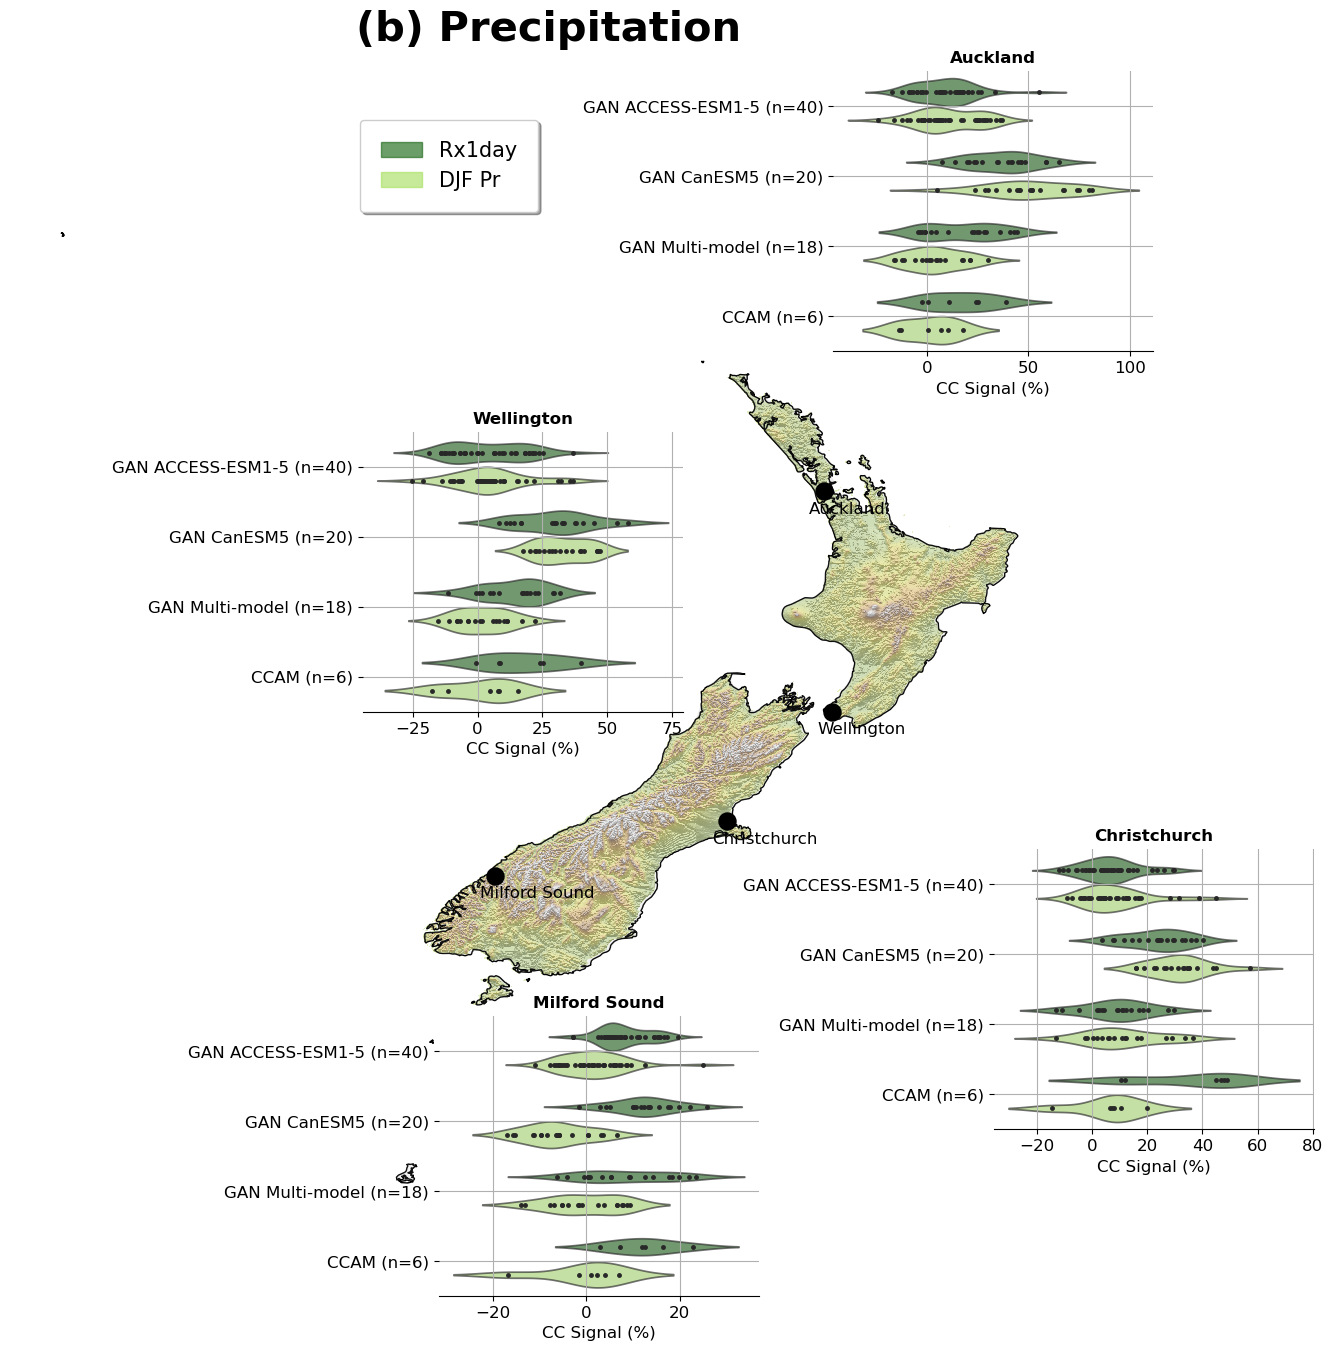

KeyboardInterrupt: 

In [1222]:
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd

# Define regions with their coordinates
import pandas as pd
import numpy as np

# def create_df(lat, lon):
#     df = pd.DataFrame()
    
# #     large_ensemble = cc_signal_pr_ai.interp(lat=lat, lon=lon).values.flatten()
# #     df.loc[:len(large_ensemble)-1, 'Large Ensemble'] = large_ensemble

#     access_arr = cc_signal_pr_ai.interp(lat=lat, lon=lon).where(cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5', drop=True).values.flatten()
#     df.loc[:len(access_arr)-1, 'ACCESS-ESM1-5 (n=40)'] = access_arr

#     other_gcms = cc_signal_pr_ai.interp(lat=lat, lon=lon).where(
#         ~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5') | (cc_signal_pr_land_ai.GCM == 'CanESM5')), drop=True
#     ).values.flatten()
#     df["GAN Multi-model (n=18)"] = np.nan
#     df.iloc[:len(other_gcms), df.columns.get_loc("GAN Multi-model (n=18)")] = other_gcms

#     canesm_arr = cc_signal_pr_ai.interp(lat=lat, lon=lon).where(cc_signal_pr_land_ai.GCM == 'CanESM5', drop=True).values.flatten()
#     df.loc[:len(canesm_arr)-1, 'CanESM5 (n=20)'] = canesm_arr

#     ccam_arr = cc_signal_pr.interp(lat=lat, lon=lon).values.flatten()
#     df.loc[:len(ccam_arr)-1, 'CCAM (n=6)'] = ccam_arr

#     return df
# grass_light =   # Light grass green for DJF rainfall
# forest_green = "#228B22"
grass_light = "#A8E063"  # Slightly lighter grass green for DJF rainfall
forest_green = "#1E6B19"  # Slightly darker forest green for RX1Day

cb_colors  = ["#1E6B19","#A8E063" ]#"#9ACD32",  "#228B22"] #"#0072B2", "#E69F00", "#009E73", "#D55E00", "#CC79A7"]
fig = plt.figure(figsize=(16, 14))
ax_map = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_map.set_extent([158, 180, -53, -31], crs=ccrs.PlateCarree())
hillshade_dset.hillshade.plot(ax = ax_map, transform = ccrs.PlateCarree(), cmap ='Greys_r', alpha =0.475, levels =50, zorder =3, add_colorbar =False)
hillshade_dset.topo.plot(ax = ax_map, transform = ccrs.PlateCarree(), cmap =custom_cmap, alpha =0.28, levels =50, zorder =4, add_colorbar =False, vmax =1500)
# Add map features
ax_map.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1, zorder =4, fc ='gray')
ax_map.add_feature(cfeature.LAND, linewidth=1, zorder =4, fc ='gray', alpha =0.1)
ax_map.add_feature(cfeature.BORDERS, linestyle=':', zorder =4)
#ax_map.add_feature(cfeature.OCEAN, facecolor='white', zorder =4, ec ='k', alpha =0.05)
#ax_map.add_feature(cfeature.LAKES, edgecolor='black', facecolor='white', zorder =4)
i =0
# Plot violin plots for each region
for region, (lat, lon) in regions.items():
    df = create_df(lat, lon)
    #df = df.melt(var_name="GCM Variant", value_name="Rx1Day CC Signal")
#     df.loc[df['GCM Variant'] =='ACCESS-ESM1-5','label'] = 'SMile'
#     df.loc[df['GCM Variant'] == 'CanESM5', 'label'] = 'SMile2'
    
    ax_violin = fig.add_axes([0, 0, 0.23, 0.23])  # Dummy position, will update
    #['box', 'quart', 'stick', 'point', None],
    sns.violinplot(
        data=df, y="GCM Variant", x="CC Signal",
        ax=ax_violin, palette=cb_colors,alpha =0.65, inner ='point', hue ="Metric", legend = False, split =False
    )#inner="box"
    #sns.swarmplot(y="GCM Variant", x="CC Signal",hue ='Metric', data=df, color='k', alpha=0.35, palette=cb_colors, split =False)
    #
    #x_violin.
    ax_map.text(lon-0.3, lat-0.45, region, transform =ccrs.PlateCarree(), fontsize =12, zorder =12, color ='k')#, weight ='bold')
    ax_map.scatter(lon, lat, transform =ccrs.PlateCarree(), s=150, color ='k', marker ='o', zorder=14)
    #ax_violin.set_xticks([])
    ax_violin.set_xlabel("CC Signal (%)", fontsize =12)
    ax_violin.set_title(region, fontsize=12, weight ='bold')
    ax_violin.grid('on')
    # Convert map coordinates to figure coordinates
    x_fig, y_fig = ax_map.transData.transform((lon, lat))
    x_fig, y_fig = fig.transFigure.inverted().transform((x_fig, y_fig))
    
    #ax_violin.set_ylim(-50, 100)
    offset_lat, offset_lon = offsets[region]
    # Adjust position of violin plot
    ax_violin.set_position([x_fig +offset_lon, y_fig +offset_lat, 0.2, 0.2])
    #ax_violin.set_frame_on(False)
    #ax_violin.set_ylabel('', fontsize =8)
    _ = ax_violin.set_ylabel(' ', fontsize =12)
    ax_violin.tick_params(labelsize =12
                         )
    sns.despine(left=True)
    i+=1
ax_map.set_frame_on(False)

import matplotlib.patches as mpatches

# Define custom legend items
legend_labels = ["Rx1day", "DJF Pr"]
#legend_colors = ["green", "yellow", "orange"]

# Create patches for legend
patches = [mpatches.Patch(color=cb_colors[i], label=legend_labels[i], alpha =0.65) for i in range(len(legend_labels))]

# Add legend to figure
fig.legend(handles=patches, loc="upper center",fontsize =15, fancybox =True, framealpha = 1, shadow = True, borderpad = 1, bbox_to_anchor =(0.45, 0.95))
ax_map.set_title('(b) Precipitation', fontsize=30, pad =120, weight ='bold') 
plt.show()
plt.show()
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/Rx1day_spatial_figre_dfj.png', dpi =500, bbox_inches ='tight')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/Rx1day_spatial_figre_dfj.pdf', dpi =500, bbox_inches ='tight')

<AxesSubplot:xlabel='CC Signal', ylabel='GCM Variant'>

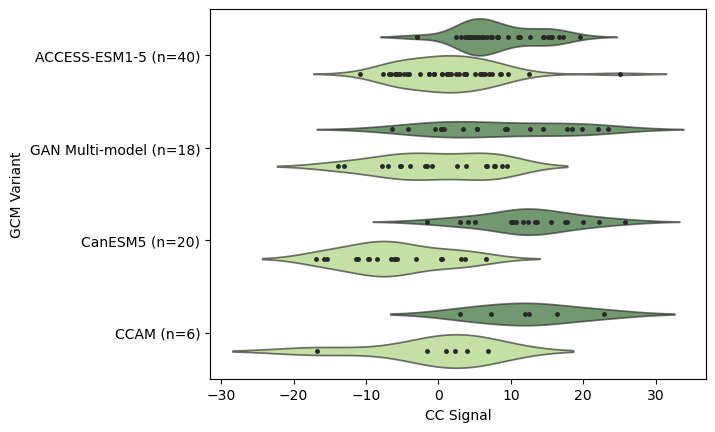

In [1208]:
    sns.violinplot(
        data=df, y="GCM Variant", x="CC Signal", palette=cb_colors,alpha =0.65, inner ='point', hue ="Metric", legend = False, split =False
    )

/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with

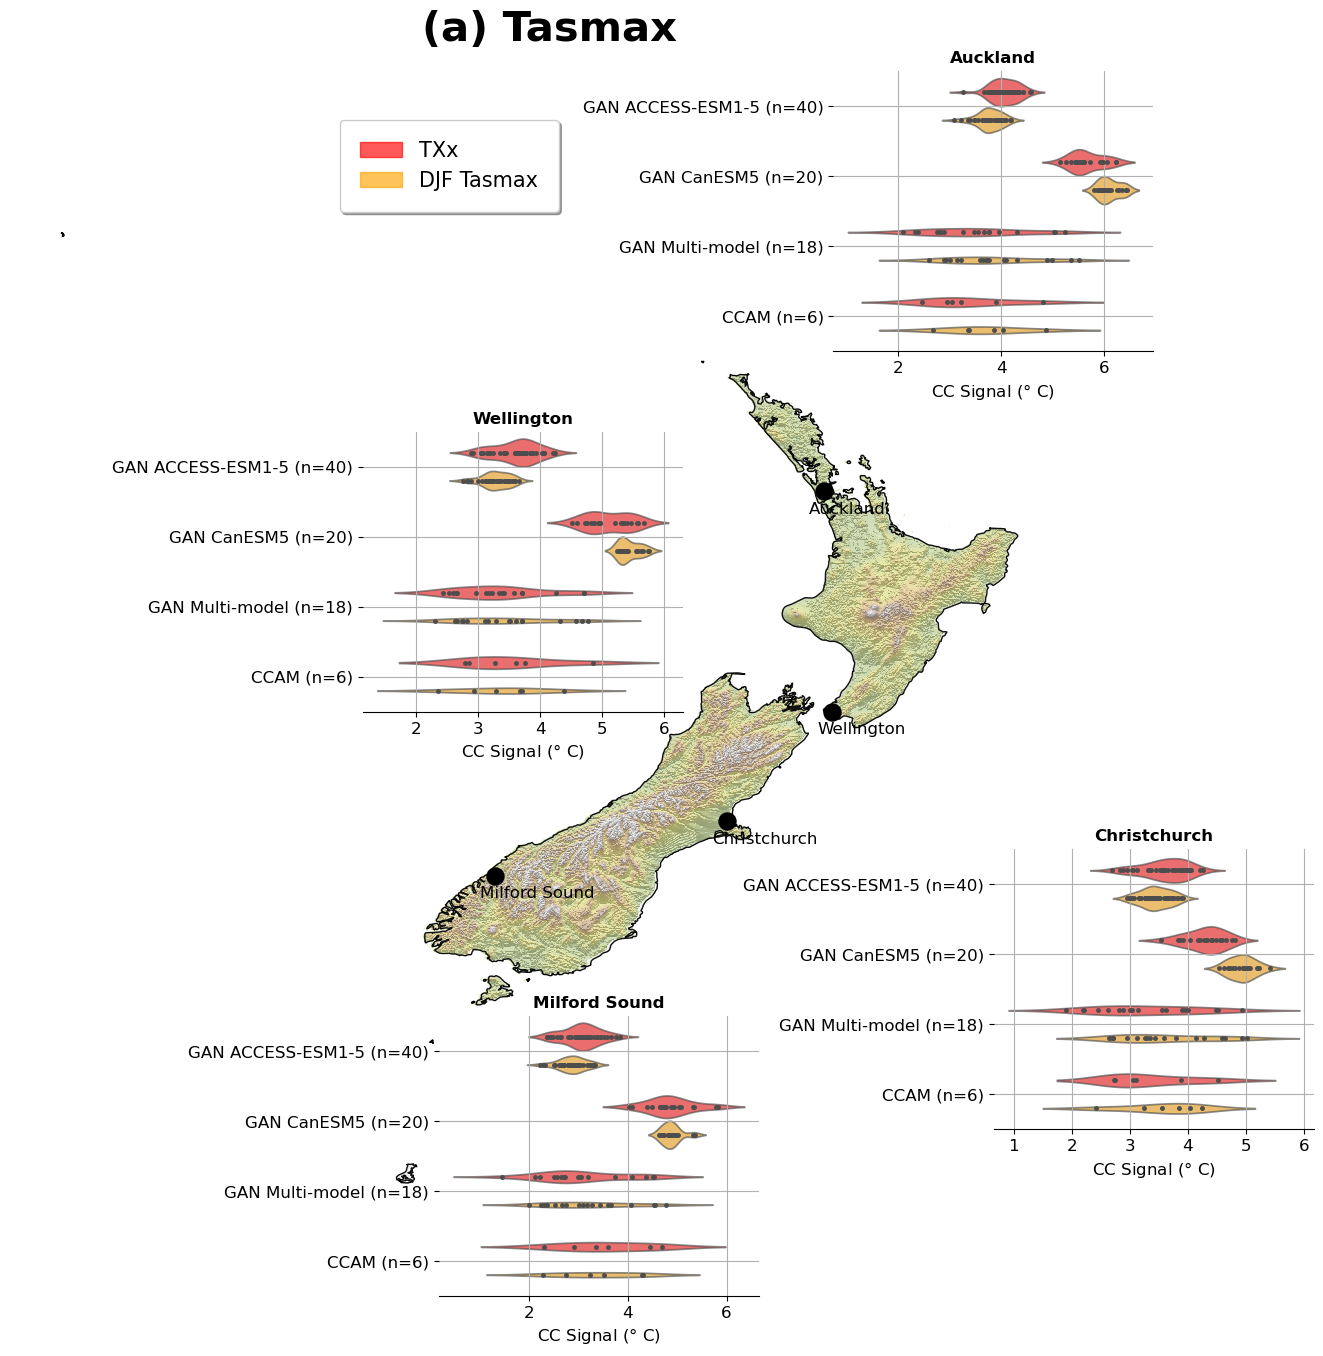

KeyboardInterrupt: 

In [1223]:
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd

# Define regions with their coordinates
import pandas as pd
import numpy as np

import numpy as np

def create_df(lat, lon, season ='DJF'):
    df1 = pd.DataFrame()
    # V1
    
    access_arr = cc_signal_tasmax_ai.interp(lat=lat, lon=lon).where(cc_signal_tasmax_land_ai.GCM == 'ACCESS-ESM1-5', drop=True).values.flatten()
    df1.loc[:len(access_arr)-1, 'GAN ACCESS-ESM1-5 (n=40)'] = access_arr
    df1['Metric'] = 'TXx'
    df1 = df1.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    df2 = pd.DataFrame()
    #V2
    access_seasonal = cc_signal_tasmax_seasonal_ai.interp(lat=lat, lon=lon).sel(season = season).where(cc_signal_tasmax_land_seasonal_ai.GCM == 'ACCESS-ESM1-5', drop=True).values.flatten()
    df2.loc[:len(access_seasonal)-1  , 'GAN ACCESS-ESM1-5 (n=40)'] = access_seasonal
    df2['Metric'] = 'DJF Tasmax'
    df2 = df2.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    # V3
    df3 = pd.DataFrame()
    other_gcms = cc_signal_tasmax_ai.interp(lat=lat, lon=lon).where(
        ~((cc_signal_tasmax_land_ai.GCM == 'ACCESS-ESM1-5') | (cc_signal_tasmax_land_ai.GCM == 'CanESM5')), drop=True
    ).values.flatten()
    df3.loc[:len(other_gcms)-1, "GAN Multi-model (n=18)"] = other_gcms
    df3['Metric'] = 'TXx'
    df3 = df3.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    # V4
    df4 = pd.DataFrame()
    other_gcms = cc_signal_tasmax_seasonal_ai.sel(season =season).interp(lat=lat, lon=lon).where(
        ~((cc_signal_tasmax_land_seasonal_ai.GCM == 'ACCESS-ESM1-5') | (cc_signal_tasmax_land_seasonal_ai.GCM == 'CanESM5')), drop=True
    ).values.flatten()
    df4.loc[:len(other_gcms)-1, "GAN Multi-model (n=18)"] = other_gcms
    df4['Metric'] = 'DJF Tasmax'
    df4 = df4.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    # V5
    df5 = pd.DataFrame()
    canesm_arr = cc_signal_tasmax_ai.interp(lat=lat, lon=lon).where(cc_signal_tasmax_land_ai.GCM == 'CanESM5', drop=True).values.flatten()
    df5.loc[:len(canesm_arr)-1, 'GAN CanESM5 (n=20)'] = canesm_arr
    df5['Metric'] = 'TXx'
    df5 = df5.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    #V6
    
    df6 = pd.DataFrame()
    canesm_arr = cc_signal_tasmax_seasonal_ai.sel(season =season).interp(lat=lat, lon=lon).where(cc_signal_tasmax_land_seasonal_ai.GCM == 'CanESM5', drop=True).values.flatten()
    df6.loc[:len(canesm_arr)-1, 'GAN CanESM5 (n=20)'] = canesm_arr
    df6['Metric'] = 'DJF Tasmax'
    df6 = df6.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    df7 = pd.DataFrame()
    ccam_arr = cc_signal_tasmax.interp(lat=lat, lon=lon).values.flatten()
    df7.loc[:len(ccam_arr)-1, 'CCAM (n=6)'] = ccam_arr
    df7['Metric'] = 'TXx'
    df7 = df7.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    df8 = pd.DataFrame()
    ccam_arr = cc_signal_tasmax_seasonal.sel(season =season).interp(lat=lat, lon=lon).values.flatten()
    df8.loc[:len(ccam_arr)-1, 'CCAM (n=6)'] = ccam_arr
    df8['Metric'] = 'DJF Tasmax'
    df8 = df8.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    df = pd.concat([df1, df2, df5, df6,df3,df4, df7,df8])
    

    return df
grass_light = "#A8E063"  # Slightly lighter grass green for DJF rainfall
forest_green = "#1E6B19"  # Slightly darker forest green for RX1Day

cb_colors  = ["red","orange" ]#"#9ACD32",  "#228B22"] #"#0072B2", "#E69F00", "#009E73", "#D55E00", "#CC79A7"]
fig = plt.figure(figsize=(16, 14))
ax_map = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_map.set_extent([158, 180, -53, -31], crs=ccrs.PlateCarree())
hillshade_dset.hillshade.plot(ax = ax_map, transform = ccrs.PlateCarree(), cmap ='Greys_r', alpha =0.475, levels =50, zorder =3, add_colorbar =False)
hillshade_dset.topo.plot(ax = ax_map, transform = ccrs.PlateCarree(), cmap =custom_cmap, alpha =0.28, levels =50, zorder =4, add_colorbar =False, vmax =1500)
# Add map features
ax_map.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1, zorder =4, fc ='gray')
ax_map.add_feature(cfeature.LAND, linewidth=1, zorder =4, fc ='gray', alpha =0.1)
ax_map.add_feature(cfeature.BORDERS, linestyle=':', zorder =4)
#ax_map.add_feature(cfeature.OCEAN, facecolor='white', zorder =4, ec ='k', alpha =0.05)
#ax_map.add_feature(cfeature.LAKES, edgecolor='black', facecolor='white', zorder =4)
i =0
# Plot violin plots for each region
for region, (lat, lon) in regions.items():
    df = create_df(lat, lon)
    #df = df.melt(var_name="GCM Variant", value_name="Rx1Day CC Signal")
#     df.loc[df['GCM Variant'] =='ACCESS-ESM1-5','label'] = 'SMile'
#     df.loc[df['GCM Variant'] == 'CanESM5', 'label'] = 'SMile2'
    
    ax_violin = fig.add_axes([0, 0, 0.23, 0.23])  # Dummy position, will update
    #['box', 'quart', 'stick', 'point', None],
    sns.violinplot(
        data=df, y="GCM Variant", x="CC Signal",
        ax=ax_violin, palette=cb_colors,alpha =0.65, inner ='point', hue ="Metric", legend = False, split =False
    )#inner="box"
    #sns.swarmplot(y="GCM Variant", x="CC Signal",hue ='Metric', data=df, color='k', alpha=0.35, palette=cb_colors, split =False)
    #
    #x_violin.
    ax_map.text(lon-0.3, lat-0.45, region, transform =ccrs.PlateCarree(), fontsize =12, zorder =12, color ='k')#, weight ='bold')
    ax_map.scatter(lon, lat, transform =ccrs.PlateCarree(), s=150, color ='k', marker ='o', zorder=14)
    #ax_violin.set_xticks([])
    ax_violin.set_xlabel("CC Signal ($\degree$ C)", fontsize =12)
    ax_violin.set_title(region, fontsize=12, weight ='bold')
    ax_violin.grid('on')
    # Convert map coordinates to figure coordinates
    x_fig, y_fig = ax_map.transData.transform((lon, lat))
    x_fig, y_fig = fig.transFigure.inverted().transform((x_fig, y_fig))
    
    #ax_violin.set_ylim(-50, 100)
    offset_lat, offset_lon = offsets[region]
    # Adjust position of violin plot
    ax_violin.set_position([x_fig +offset_lon, y_fig +offset_lat, 0.2, 0.2])
    #ax_violin.set_frame_on(False)
    #ax_violin.set_ylabel('', fontsize =8)
    _ = ax_violin.set_ylabel(' ', fontsize =12)
    ax_violin.tick_params(labelsize =12
                         )
    sns.despine(left=True)
    i+=1
ax_map.set_frame_on(False)

import matplotlib.patches as mpatches

# Define custom legend items
legend_labels = ["TXx", "DJF Tasmax"]
#legend_colors = ["green", "yellow", "orange"]

# Create patches for legend
patches = [mpatches.Patch(color=cb_colors[i], label=legend_labels[i], alpha =0.65) for i in range(len(legend_labels))]

# Add legend to figure
fig.legend(handles=patches, loc="upper center",fontsize =15, fancybox =True, framealpha = 1, shadow = True, borderpad = 1, bbox_to_anchor =(0.45, 0.95))
ax_map.set_title('(a) Tasmax', fontsize=30, pad =120, weight ='bold') 
plt.show()
plt.show()
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/TXX_spatial_figre_dfj.png', dpi =500, bbox_inches ='tight')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/TXX_spatial_figre_dfj.pdf', dpi =500, bbox_inches ='tight')

/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/home/rampaln/.local/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with

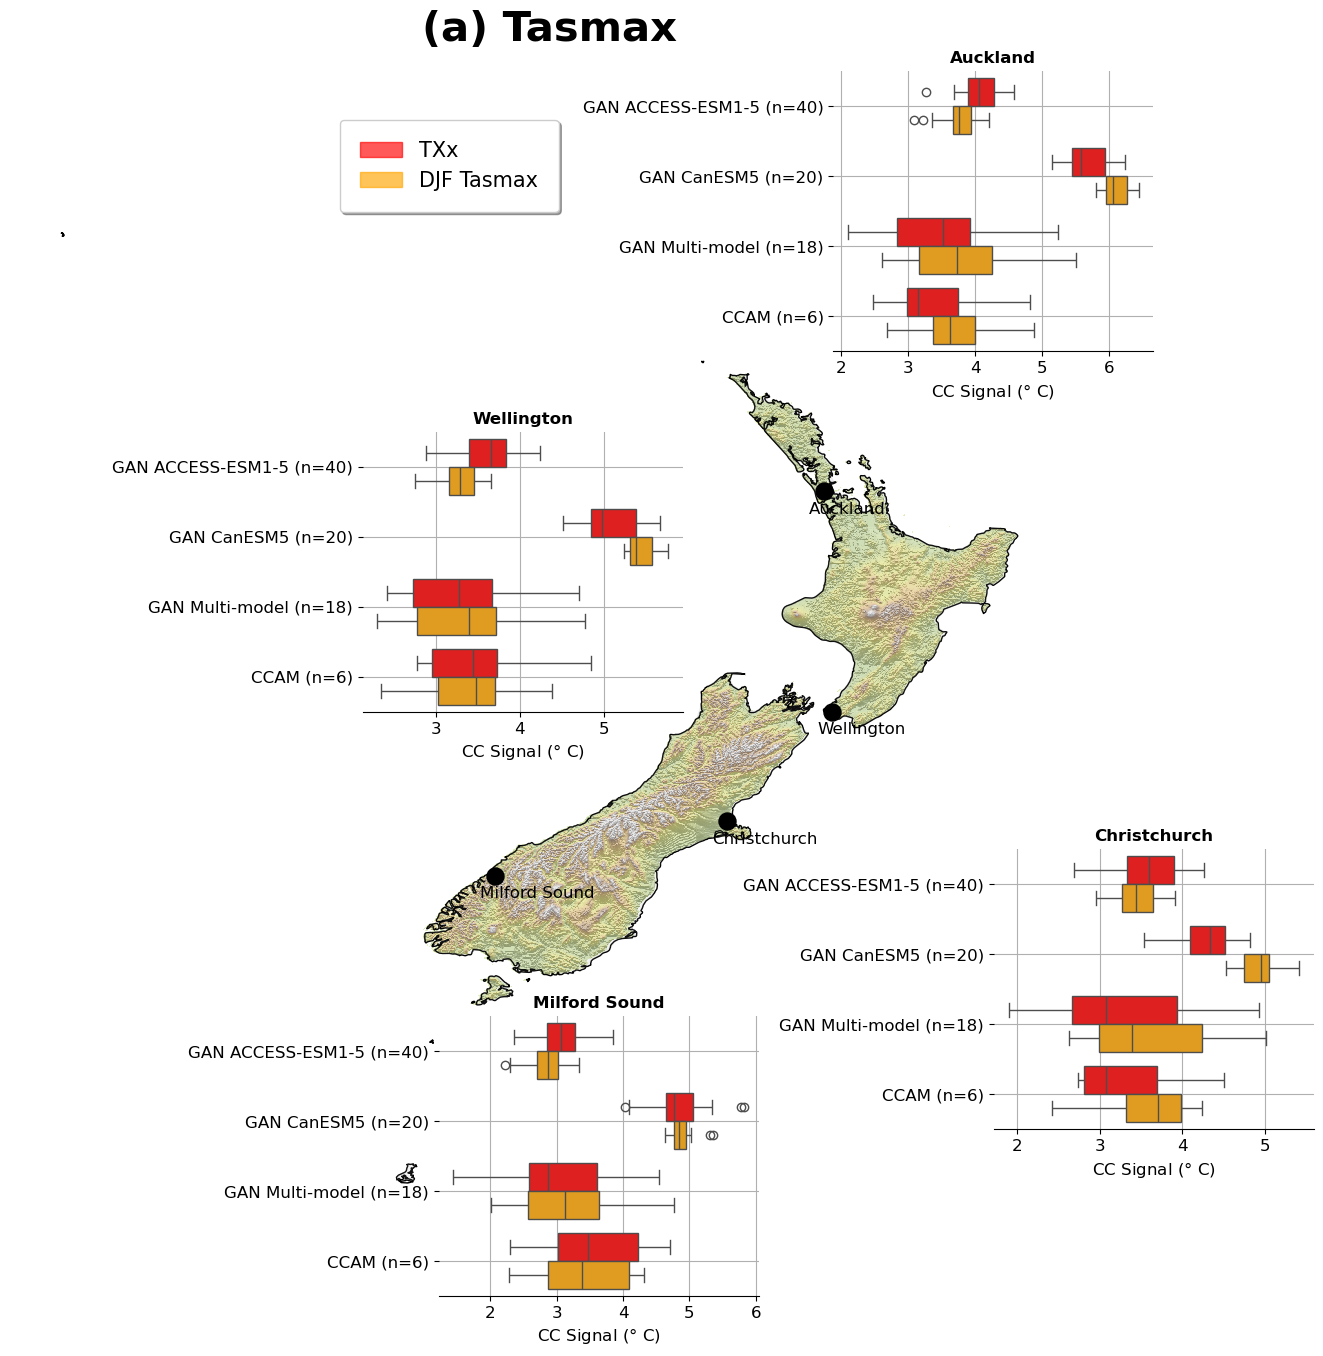

In [1227]:
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd

# Define regions with their coordinates
import pandas as pd
import numpy as np

import numpy as np

def create_df(lat, lon, season ='DJF'):
    df1 = pd.DataFrame()
    # V1
    
    access_arr = cc_signal_tasmax_ai.interp(lat=lat, lon=lon).where(cc_signal_tasmax_land_ai.GCM == 'ACCESS-ESM1-5', drop=True).values.flatten()
    df1.loc[:len(access_arr)-1, 'GAN ACCESS-ESM1-5 (n=40)'] = access_arr
    df1['Metric'] = 'TXx'
    df1 = df1.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    df2 = pd.DataFrame()
    #V2
    access_seasonal = cc_signal_tasmax_seasonal_ai.interp(lat=lat, lon=lon).sel(season = season).where(cc_signal_tasmax_land_seasonal_ai.GCM == 'ACCESS-ESM1-5', drop=True).values.flatten()
    df2.loc[:len(access_seasonal)-1  , 'GAN ACCESS-ESM1-5 (n=40)'] = access_seasonal
    df2['Metric'] = 'DJF Tasmax'
    df2 = df2.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    # V3
    df3 = pd.DataFrame()
    other_gcms = cc_signal_tasmax_ai.interp(lat=lat, lon=lon).where(
        ~((cc_signal_tasmax_land_ai.GCM == 'ACCESS-ESM1-5') | (cc_signal_tasmax_land_ai.GCM == 'CanESM5')), drop=True
    ).values.flatten()
    df3.loc[:len(other_gcms)-1, "GAN Multi-model (n=18)"] = other_gcms
    df3['Metric'] = 'TXx'
    df3 = df3.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    # V4
    df4 = pd.DataFrame()
    other_gcms = cc_signal_tasmax_seasonal_ai.sel(season =season).interp(lat=lat, lon=lon).where(
        ~((cc_signal_tasmax_land_seasonal_ai.GCM == 'ACCESS-ESM1-5') | (cc_signal_tasmax_land_seasonal_ai.GCM == 'CanESM5')), drop=True
    ).values.flatten()
    df4.loc[:len(other_gcms)-1, "GAN Multi-model (n=18)"] = other_gcms
    df4['Metric'] = 'DJF Tasmax'
    df4 = df4.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    # V5
    df5 = pd.DataFrame()
    canesm_arr = cc_signal_tasmax_ai.interp(lat=lat, lon=lon).where(cc_signal_tasmax_land_ai.GCM == 'CanESM5', drop=True).values.flatten()
    df5.loc[:len(canesm_arr)-1, 'GAN CanESM5 (n=20)'] = canesm_arr
    df5['Metric'] = 'TXx'
    df5 = df5.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    #V6
    
    df6 = pd.DataFrame()
    canesm_arr = cc_signal_tasmax_seasonal_ai.sel(season =season).interp(lat=lat, lon=lon).where(cc_signal_tasmax_land_seasonal_ai.GCM == 'CanESM5', drop=True).values.flatten()
    df6.loc[:len(canesm_arr)-1, 'GAN CanESM5 (n=20)'] = canesm_arr
    df6['Metric'] = 'DJF Tasmax'
    df6 = df6.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    df7 = pd.DataFrame()
    ccam_arr = cc_signal_tasmax.interp(lat=lat, lon=lon).values.flatten()
    df7.loc[:len(ccam_arr)-1, 'CCAM (n=6)'] = ccam_arr
    df7['Metric'] = 'TXx'
    df7 = df7.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    df8 = pd.DataFrame()
    ccam_arr = cc_signal_tasmax_seasonal.sel(season =season).interp(lat=lat, lon=lon).values.flatten()
    df8.loc[:len(ccam_arr)-1, 'CCAM (n=6)'] = ccam_arr
    df8['Metric'] = 'DJF Tasmax'
    df8 = df8.melt(var_name="GCM Variant", value_name="CC Signal", id_vars=["Metric"])
    
    df = pd.concat([df1, df2, df5, df6,df3,df4, df7,df8])
    

    return df
grass_light = "#A8E063"  # Slightly lighter grass green for DJF rainfall
forest_green = "#1E6B19"  # Slightly darker forest green for RX1Day

cb_colors  = ["red","orange" ]#"#9ACD32",  "#228B22"] #"#0072B2", "#E69F00", "#009E73", "#D55E00", "#CC79A7"]
fig = plt.figure(figsize=(16, 14))
ax_map = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_map.set_extent([158, 180, -53, -31], crs=ccrs.PlateCarree())
hillshade_dset.hillshade.plot(ax = ax_map, transform = ccrs.PlateCarree(), cmap ='Greys_r', alpha =0.475, levels =50, zorder =3, add_colorbar =False)
hillshade_dset.topo.plot(ax = ax_map, transform = ccrs.PlateCarree(), cmap =custom_cmap, alpha =0.28, levels =50, zorder =4, add_colorbar =False, vmax =1500)
# Add map features
ax_map.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1, zorder =4, fc ='gray')
ax_map.add_feature(cfeature.LAND, linewidth=1, zorder =4, fc ='gray', alpha =0.1)
ax_map.add_feature(cfeature.BORDERS, linestyle=':', zorder =4)
#ax_map.add_feature(cfeature.OCEAN, facecolor='white', zorder =4, ec ='k', alpha =0.05)
#ax_map.add_feature(cfeature.LAKES, edgecolor='black', facecolor='white', zorder =4)
i =0
# Plot violin plots for each region
for region, (lat, lon) in regions.items():
    df = create_df(lat, lon)
    #df = df.melt(var_name="GCM Variant", value_name="Rx1Day CC Signal")
#     df.loc[df['GCM Variant'] =='ACCESS-ESM1-5','label'] = 'SMile'
#     df.loc[df['GCM Variant'] == 'CanESM5', 'label'] = 'SMile2'
    
    ax_violin = fig.add_axes([0, 0, 0.23, 0.23])  # Dummy position, will update
    #['box', 'quart', 'stick', 'point', None],
    sns.boxplot(
        data=df, y="GCM Variant", x="CC Signal",
        ax=ax_violin, palette=cb_colors, hue ="Metric", legend = False,
    )#inner="box"
    #sns.swarmplot(y="GCM Variant", x="CC Signal",hue ='Metric', data=df, color='k', alpha=0.35, palette=cb_colors, split =False)
    #
    #x_violin.
    ax_map.text(lon-0.3, lat-0.45, region, transform =ccrs.PlateCarree(), fontsize =12, zorder =12, color ='k')#, weight ='bold')
    ax_map.scatter(lon, lat, transform =ccrs.PlateCarree(), s=150, color ='k', marker ='o', zorder=14)
    #ax_violin.set_xticks([])
    ax_violin.set_xlabel("CC Signal ($\degree$ C)", fontsize =12)
    ax_violin.set_title(region, fontsize=12, weight ='bold')
    ax_violin.grid('on')
    # Convert map coordinates to figure coordinates
    x_fig, y_fig = ax_map.transData.transform((lon, lat))
    x_fig, y_fig = fig.transFigure.inverted().transform((x_fig, y_fig))
    
    #ax_violin.set_ylim(-50, 100)
    offset_lat, offset_lon = offsets[region]
    # Adjust position of violin plot
    ax_violin.set_position([x_fig +offset_lon, y_fig +offset_lat, 0.2, 0.2])
    #ax_violin.set_frame_on(False)
    #ax_violin.set_ylabel('', fontsize =8)
    _ = ax_violin.set_ylabel(' ', fontsize =12)
    ax_violin.tick_params(labelsize =12
                         )
    sns.despine(left=True)
    i+=1
ax_map.set_frame_on(False)

import matplotlib.patches as mpatches

# Define custom legend items
legend_labels = ["TXx", "DJF Tasmax"]
#legend_colors = ["green", "yellow", "orange"]

# Create patches for legend
patches = [mpatches.Patch(color=cb_colors[i], label=legend_labels[i], alpha =0.65) for i in range(len(legend_labels))]

# Add legend to figure
fig.legend(handles=patches, loc="upper center",fontsize =15, fancybox =True, framealpha = 1, shadow = True, borderpad = 1, bbox_to_anchor =(0.45, 0.95))
ax_map.set_title('(a) Tasmax', fontsize=30, pad =120, weight ='bold') 
plt.show()
plt.show()
#fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/TXX_spatial_figre_dfj.png', dpi =500, bbox_inches ='tight')
#fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/TXX_spatial_figre_dfj.pdf', dpi =500, bbox_inches ='tight')

In [ ]:
Z=1

In [1201]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import numpy as np
# import pandas as pd

# # Define regions with their coordinates
# import pandas as pd
# import numpy as np

# def create_df(lat, lon):
#     df = pd.DataFrame()
    
# #     large_ensemble = cc_signal_pr_ai.interp(lat=lat, lon=lon).values.flatten()
# #     df.loc[:len(large_ensemble)-1, 'Large Ensemble'] = large_ensemble

#     access_arr = cc_signal_pr_ai.interp(lat=lat, lon=lon).where(cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5', drop=True).values.flatten()
#     df.loc[:len(access_arr)-1, 'ACCESS-ESM1-5 (n=40)'] = access_arr

#     other_gcms = cc_signal_pr_ai.interp(lat=lat, lon=lon).where(
#         ~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5') | (cc_signal_pr_land_ai.GCM == 'CanESM5')), drop=True
#     ).values.flatten()
#     df["GAN Multi-model (n=18)"] = np.nan
#     df.iloc[:len(other_gcms), df.columns.get_loc("GAN Multi-model (n=18)")] = other_gcms

#     canesm_arr = cc_signal_pr_ai.interp(lat=lat, lon=lon).where(cc_signal_pr_land_ai.GCM == 'CanESM5', drop=True).values.flatten()
#     df.loc[:len(canesm_arr)-1, 'CanESM5 (n=20)'] = canesm_arr

#     ccam_arr = cc_signal_pr.interp(lat=lat, lon=lon).values.flatten()
#     df.loc[:len(ccam_arr)-1, 'CCAM (n=6)'] = ccam_arr

#     return df

# cb_colors  = ["#0072B2", "#E69F00", "#009E73", "#D55E00", "#CC79A7"]
# fig = plt.figure(figsize=(16, 14))
# ax_map = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax_map.set_extent([160, 180, -53, -32], crs=ccrs.PlateCarree())
# #static_fields.orog.where(static_fields.orog>0.0, np.nan).ffill("lat", limit =5).ffill("lon", limit =5).plot(ax = ax_map, transform = ccrs.PlateCarree(), cmap ='terrain', alpha =0.15, levels =50, zorder =3, add_colorbar =False)
# # Add map features
# ax_map.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1, zorder =4, fc ='gray')
# ax_map.add_feature(cfeature.LAND, linewidth=1, zorder =4, fc ='gray', alpha =0.1)
# ax_map.add_feature(cfeature.BORDERS, linestyle=':', zorder =4)
# ax_map.add_feature(cfeature.OCEAN, facecolor='white', zorder =3, ec ='k', alpha =0.05)
# ax_map.add_feature(cfeature.LAKES, edgecolor='black', facecolor='white', zorder =4)
# i =0
# # Plot violin plots for each region
# for region, (lat, lon) in regions.items():
#     df = create_df(lat, lon)
#     df = df.melt(var_name="GCM Variant", value_name="Rx1Day CC Signal")
# #     df.loc[df['GCM Variant'] =='ACCESS-ESM1-5','label'] = 'SMile'
# #     df.loc[df['GCM Variant'] == 'CanESM5', 'label'] = 'SMile2'
    
#     ax_violin = fig.add_axes([0, 0, 0.23, 0.23])  # Dummy position, will update
#     #['box', 'quart', 'stick', 'point', None],
#     sns.violinplot(
#         data=df, y="GCM Variant", x="Rx1Day CC Signal",
#         ax=ax_violin, palette=cb_colors,alpha =0.35, inner ='quart'
#     )#inner="box"
#     sns.swarmplot(y="GCM Variant", x="Rx1Day CC Signal", data=df, color='k', alpha=0.35, palette=cb_colors)
#     #
#     #x_violin.
#     ax_map.text(lon-0.3, lat-0.45, region, transform =ccrs.PlateCarree(), fontsize =12, zorder =12, color ='k')#, weight ='bold')
#     ax_map.scatter(lon, lat, transform =ccrs.PlateCarree(), s=150, color ='k', marker ='o', zorder=14)
#     #ax_violin.set_xticks([])
#     ax_violin.set_xlabel("Rx1day CC Signal (%)", fontsize =12)
#     ax_violin.set_title(region, fontsize=12, weight ='bold')

#     # Convert map coordinates to figure coordinates
#     x_fig, y_fig = ax_map.transData.transform((lon, lat))
#     x_fig, y_fig = fig.transFigure.inverted().transform((x_fig, y_fig))
    
#     #ax_violin.set_ylim(-50, 100)
#     offset_lat, offset_lon = offsets[region]
#     # Adjust position of violin plot
#     ax_violin.set_position([x_fig +offset_lon, y_fig +offset_lat, 0.2, 0.2])
#     #ax_violin.set_frame_on(False)
#     #ax_violin.set_ylabel('', fontsize =8)
#     _ = ax_violin.set_ylabel(' ', fontsize =12)
#     ax_violin.tick_params(labelsize =12
#                          )
#     sns.despine(left=True)
#     i+=1
# ax_map.set_frame_on(False)
# plt.show()
# fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/Rx1day_spatial_figre.png', dpi =500, bbox_inches ='tight')
# fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/Rx1day_spatial_figre.pdf', dpi =500, bbox_inches ='tight')

In [1202]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import numpy as np
# import pandas as pd

# # Define regions with their coordinates
# import pandas as pd
# import numpy as np

# def create_df(lat, lon):
#     df = pd.DataFrame()
    
# #     large_ensemble = cc_signal_pr_ai.interp(lat=lat, lon=lon).values.flatten()
# #     df.loc[:len(large_ensemble)-1, 'Large Ensemble'] = large_ensemble

#     access_arr = cc_signal_tasmax_ai.interp(lat=lat, lon=lon).where(cc_signal_tasmax_land_ai.GCM == 'ACCESS-ESM1-5', drop=True).values.flatten()
#     df.loc[:len(access_arr)-1, 'ACCESS-ESM1-5 (n=40)'] = access_arr

#     other_gcms = cc_signal_tasmax_ai.interp(lat=lat, lon=lon).where(
#         ~((cc_signal_tasmax_land_ai.GCM == 'ACCESS-ESM1-5') | (cc_signal_tasmax_land_ai.GCM == 'CanESM5')), drop=True
#     ).values.flatten()
#     df["GAN Multi-model (n=18)"] = np.nan
#     df.iloc[:len(other_gcms), df.columns.get_loc("GAN Multi-model (n=18)")] = other_gcms

#     canesm_arr = cc_signal_tasmax_ai.interp(lat=lat, lon=lon).where(cc_signal_tasmax_land_ai.GCM == 'CanESM5', drop=True).values.flatten()
#     df.loc[:len(canesm_arr)-1, 'CanESM5 (n=20)'] = canesm_arr

#     ccam_arr = cc_signal_tasmax.interp(lat=lat, lon=lon).values.flatten()
#     df.loc[:len(ccam_arr)-1, 'CCAM (n=6)'] = ccam_arr

#     return df

# cb_colors  = ["#0072B2", "#E69F00", "#009E73", "#D55E00", "#CC79A7"]
# fig = plt.figure(figsize=(16, 14))
# ax_map = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax_map.set_extent([160, 180, -53, -32], crs=ccrs.PlateCarree())
# #static_fields.orog.where(static_fields.orog>0.0, np.nan).ffill("lat", limit =5).ffill("lon", limit =5).plot(ax = ax_map, transform = ccrs.PlateCarree(), cmap ='terrain', alpha =0.15, levels =50, zorder =3, add_colorbar =False)
# # Add map features
# ax_map.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1, zorder =4, fc ='gray')
# ax_map.add_feature(cfeature.LAND, linewidth=1, zorder =4, fc ='gray', alpha =0.1)
# ax_map.add_feature(cfeature.BORDERS, linestyle=':', zorder =4)
# ax_map.add_feature(cfeature.OCEAN, facecolor='white', zorder =3, ec ='k', alpha =0.05)
# ax_map.add_feature(cfeature.LAKES, edgecolor='black', facecolor='white', zorder =4)
# i =0
# # Plot violin plots for each region
# for region, (lat, lon) in regions.items():
#     df = create_df(lat, lon)
#     df = df.melt(var_name="GCM Variant", value_name="Rx1Day CC Signal")
# #     df.loc[df['GCM Variant'] =='ACCESS-ESM1-5','label'] = 'SMile'
# #     df.loc[df['GCM Variant'] == 'CanESM5', 'label'] = 'SMile2'
    
#     ax_violin = fig.add_axes([0, 0, 0.23, 0.23])  # Dummy position, will update
#     #['box', 'quart', 'stick', 'point', None],
#     sns.violinplot(
#         data=df, y="GCM Variant", x="Rx1Day CC Signal",
#         ax=ax_violin, palette=cb_colors,alpha =0.35, inner ='quart'
#     )#inner="box"
#     sns.swarmplot(y="GCM Variant", x="Rx1Day CC Signal", data=df, color='k', alpha=0.35, palette=cb_colors)
#     #
#     #x_violin.
#     ax_map.text(lon-0.3, lat-0.45, region, transform =ccrs.PlateCarree(), fontsize =12, zorder =12, color ='k')#, weight ='bold')
#     ax_map.scatter(lon, lat, transform =ccrs.PlateCarree(), s=150, color ='k', marker ='o', zorder=14)
#     #ax_violin.set_xticks([])
#     ax_violin.set_xlabel("TXx CC Signal ($\degree$ C)", fontsize =12)
#     ax_violin.set_title(region, fontsize=12, weight ='bold')

#     # Convert map coordinates to figure coordinates
#     x_fig, y_fig = ax_map.transData.transform((lon, lat))
#     x_fig, y_fig = fig.transFigure.inverted().transform((x_fig, y_fig))
    
#     #ax_violin.set_ylim(-50, 100)
#     offset_lat, offset_lon = offsets[region]
#     # Adjust position of violin plot
#     ax_violin.set_position([x_fig +offset_lon, y_fig +offset_lat, 0.2, 0.2])
#     #ax_violin.set_frame_on(False)
#     #ax_violin.set_ylabel('', fontsize =8)
#     _ = ax_violin.set_ylabel(' ', fontsize =12)
#     ax_violin.tick_params(labelsize =12)
#     sns.despine(left=True)
#     i+=1
# ax_map.set_frame_on(False)
# fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/TXX_spatial_figre.png', dpi =500, bbox_inches ='tight')
# fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/TXX_spatial_figre.pdf', dpi =500, bbox_inches ='tight')

In [680]:
np.where((df['GCM Variant'] == 'CanESM5').values ==True)[0].shape

(40,)

/tmp/ipykernel_428168/2323206282.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Ensemble', y='Rainfall Projection', data=df, palette=palette, inner="box")


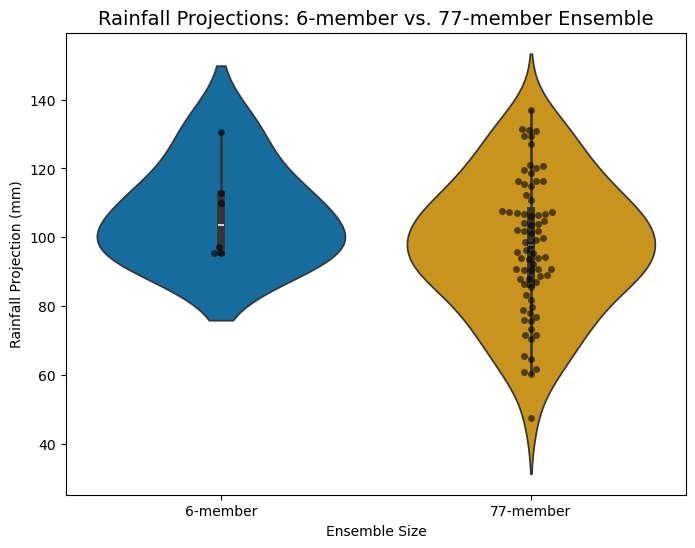

In [666]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic rainfall projection data (e.g., in mm)
# Both ensembles have the same mean and variability, but the larger ensemble will reveal more structure.
ensemble6 = np.random.normal(loc=100, scale=20, size=6)
ensemble77 = np.random.normal(loc=100, scale=20, size=77)

# Create a DataFrame combining both ensembles
df = pd.DataFrame({
    'Rainfall Projection': np.concatenate([ensemble6, ensemble77]),
    'Ensemble': ['6-member'] * len(ensemble6) + ['77-member'] * len(ensemble77)
})

# Define a colorblind-friendly palette for the two groups
palette = {"6-member": "#0072B2", "77-member": "#E69F00"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Ensemble', y='Rainfall Projection', data=df, palette=palette, inner="box")
sns.swarmplot(x='Ensemble', y='Rainfall Projection', data=df, color='k', alpha=0.6)

plt.title('Rainfall Projections: 6-member vs. 77-member Ensemble', fontsize=14)
plt.xlabel('Ensemble Size')
plt.ylabel('Rainfall Projection (mm)')

plt.show()


In [604]:
static_fields.orog.where(static_fields.orog>0.0, np.nan).ffill("lat", limit =5).ffill("lon", limit =5)

<xarray.DataArray 'orog' (lat: 172, lon: 179)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 164.9 165.0 165.1 165.2 ... 183.6 183.7 183.9 184.0
  * lat      (lat) float32 -51.21 -51.11 -51.0 -50.89 ... -33.07 -32.97 -32.86
Attributes:
    long_name:      Surface height
    standard_name:  surface_altitude
    units:          m

In [557]:
df

GCM Variant  Precipitation Change
0    Large Ensemble             31.537474
1    Large Ensemble              4.089932
2    Large Ensemble             15.047966
3    Large Ensemble             33.213710
4    Large Ensemble             16.989147
..              ...                   ...
380            CCAM                   NaN
381            CCAM                   NaN
382            CCAM                   NaN
383            CCAM                   NaN
384            CCAM                   NaN

[385 rows x 2 columns]

In [554]:
df

Large Ensemble  ACCESS-ESM1-5  All GCMs (except ACCESS-ESM1-5 & CanESM5)  \
0        47.946228      10.556880                                  47.946228   
1        10.556880       9.557459                                  11.532458   
2         9.557459      15.786645                                   2.993427   
3        15.786645      -3.757686                                  -4.637210   
4        -3.757686     -11.088430                                  37.199692   
..             ...            ...                                        ...   
72       27.300617            NaN                                        NaN   
73       -4.283697            NaN                                        NaN   
74        1.103536            NaN                                        NaN   
75       15.395894            NaN                                        NaN   
76       25.271367            NaN                                        NaN   

      CanESM5       CCAM  
0   38.229665  44.632415  
1   56.352545  38.271497  
2   32.690690  14.802699  
3   25.046928   6.042086  
4   45.221650  -1.843930  
..        ...        ...  
72        NaN        NaN  
73        NaN        NaN  
74        NaN        NaN  
75        NaN        NaN  
76        NaN        NaN  

[77 rows x 5 columns]

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load data (replace with actual file paths)
# ds = xr.open_dataset("your_data.nc")

# Example city coordinates in NZ (lat, lon)
cities = {
    "Auckland": (-36.85, 174.76),
    "Wellington": (-41.28, 174.77),
    "Christchurch": (-43.53, 172.63),
    "Dunedin": (-45.87, 170.50)
}

# Create figure and axes
fig, axes = plt.subplots(2, len(cities), figsize=(12, 6), sharex=True, sharey=False)
ds = , add_colorbar=False
# Projection for map inset
map_proj = ccrs.PlateCarree(central_longitude=171.77)

# Loop over cities
for i, (city, (lat, lon)) in enumerate(cities.items()):
    # Extract time series at each location
    ai_trend = ds["Rx1day"].sel(lat=lat, lon=lon, method="nearest").mean("GCM_variant")
    ai_range = ds["Rx1day"].sel(lat=lat, lon=lon, method="nearest").quantile([0.1, 0.9], dim="GCM_variant")

    dyn_trend = ds["TXx"].sel(lat=lat, lon=lon, method="nearest").mean("GCM_variant")
    dyn_range = ds["TXx"].sel(lat=lat, lon=lon, method="nearest").quantile([0.1, 0.9], dim="GCM_variant")

    years = ds["year"]

    # Left column: AI trends
    ax1 = axes[0, i]
    ax1.plot(years, ai_trend, label="AI Mean", color="blue")
    ax1.fill_between(years, ai_range.isel(quantile=0), ai_range.isel(quantile=1), color="blue", alpha=0.3)
    ax1.set_title(city)
    ax1.set_ylabel("Rx1day Trend (mm/day per decade)")
    
    # Right column: Dynamical Downscaling trends
    ax2 = axes[1, i]
    ax2.plot(years, dyn_trend, label="Dynamical Mean", color="red")
    ax2.fill_between(years, dyn_range.isel(quantile=0), dyn_range.isel(quantile=1), color="red", alpha=0.3)
    ax2.set_ylabel("TxX Trend (°C per decade)")

# Adjust layout
fig.tight_layout()

# Create inset map
fig.add_axes([0.7, 0.7, 0.25, 0.25], projection=map_proj)
ax_map = plt.gca()
ax_map.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax_map.add_feature(cfeature.COASTLINE, linewidth=1)
ax_map.add_feature(cfeature.BORDERS, linestyle=':')
ax_map.add_feature(cfeature.LAND, color="lightgray")

# Plot city markers
for city, (lat, lon) in cities.items():
    ax_map.scatter(lon, lat, color="black", s=50, transform=ccrs.PlateCarree(), label=city)

ax_map.legend()
plt.show()


SyntaxError: invalid syntax (3861304296.py, line 20)

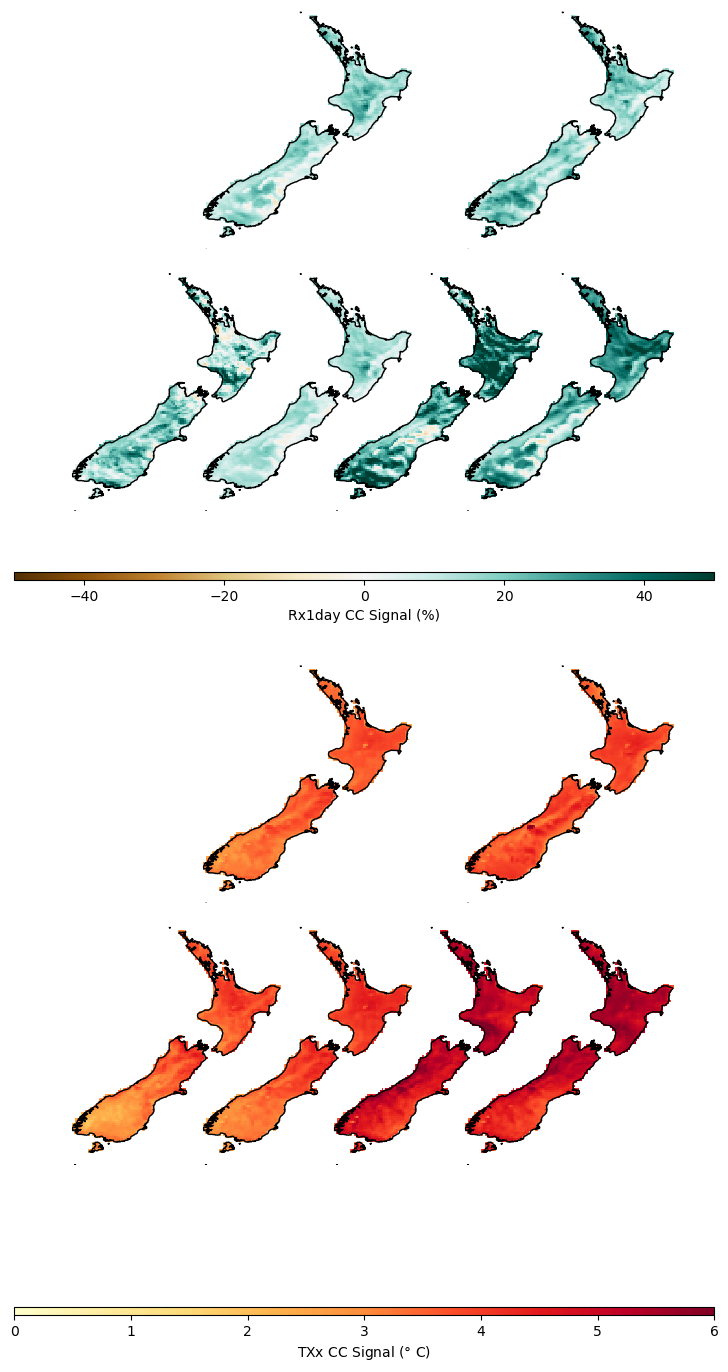

In [782]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(9, 12)

ax = fig.add_subplot(gs[0:2, 1:3], projection=map_proj)
ax.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
  # Placeholder for random data
im = cc_signal_pr_ai.where(static_fields.orog >0).sel(GCM_variant=~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_ai.GCM == 'CanESM5'))).mean(["GCM_variant"]).plot(ax=ax, transform = ccrs.PlateCarree(), cmap ='BrBG', add_colorbar=False, vmin =-50, vmax =50)
#plt.colorbar(im, ax=ax, orientation="vertical", label=var)

# plot_data = ds[var].mean("time")  # Replace with actual data variable
plot_data = np.random.randn(100, 100)  # Placeholder for random data
ax1 = fig.add_subplot(gs[0:2, 3:5], projection=map_proj)
ax1.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, color="lightgray")
im = cc_signal_pr.where(static_fields.orog >0).mean(["GCM"]).plot(ax=ax1, transform = ccrs.PlateCarree(), cmap ='BrBG', add_colorbar=False, vmin =-50, vmax =50)
ax1.set_frame_on(False)
ax.set_frame_on(False)




ax3 = fig.add_subplot(gs[2:4, 0:2], projection=map_proj)
ax3.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.COASTLINE, linewidth=1)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
  # Placeholder for random data
im = cc_signal_pr_ai.where(static_fields.orog >0).sel(GCM_variant=(cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')).isel(GCM_variant =0).drop("GCM_variant").plot(ax=ax3, transform = ccrs.PlateCarree(), cmap ='BrBG', add_colorbar=False, vmin =-50, vmax =50)
ax3.set_frame_on(False)
ax3.set_title(' ')

ax4 = fig.add_subplot(gs[2:4, 1:3], projection=map_proj)
ax4.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.COASTLINE, linewidth=1)
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
  # Placeholder for random data
im = cc_signal_pr_ai.where(static_fields.orog >0).sel(GCM_variant=(cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')).mean("GCM_variant").plot(ax=ax4, transform = ccrs.PlateCarree(), cmap ='BrBG', add_colorbar=False, vmin =-50, vmax =50)
ax4.set_frame_on(False)


ax5 = fig.add_subplot(gs[2:4, 2:4], projection=map_proj)
ax5.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.COASTLINE, linewidth=1)
ax5.add_feature(cfeature.BORDERS, linestyle=':')
ax5.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
  # Placeholder for random data
im = cc_signal_pr_ai.where(static_fields.orog >0).sel(GCM_variant=(cc_signal_pr_land_ai.GCM == 'CanESM5')).isel(GCM_variant =0).drop("GCM_variant").plot(ax=ax5, transform = ccrs.PlateCarree(), cmap ='BrBG', add_colorbar=False, vmin =-50, vmax =50)
ax5.set_frame_on(False)
ax5.set_title(' ')

ax6 = fig.add_subplot(gs[2:4, 3:5], projection=map_proj)
ax6.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.COASTLINE, linewidth=1)
ax6.add_feature(cfeature.BORDERS, linestyle=':')
ax6.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
  # Placeholder for random data
im = cc_signal_pr_ai.where(static_fields.orog >0).sel(GCM_variant=(cc_signal_pr_land_ai.GCM == 'CanESM5')).mean("GCM_variant").plot(ax=ax6, transform = ccrs.PlateCarree(), cmap ='BrBG', add_colorbar=False, vmin =-50, vmax =50)
ax6.set_frame_on(False)





csbar = fig.add_axes([0.1, 0.5, 0.35, 0.005])
cbar = fig.colorbar(im, cax = csbar, orientation ='horizontal')
cbar.set_label('Rx1day CC Signal (%)')






cmap ='YlOrRd'



ax = fig.add_subplot(gs[5:7, 1:3], projection=map_proj)
ax.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
  # Placeholder for random data
im = cc_signal_tasmax_ai.where(static_fields.orog >0).sel(GCM_variant=~((cc_signal_tasmax_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_tasmax_land_ai.GCM == 'CanESM5'))).mean(["GCM_variant"]).plot(ax=ax, transform = ccrs.PlateCarree(), cmap =cmap, add_colorbar=False, vmin =0, vmax =6)
#plt.colorbar(im, ax=ax, orientation="vertical", label=var)

# plot_data = ds[var].mean("time")  # Replace with actual data variable
plot_data = np.random.randn(100, 100)  # Placeholder for random data
ax1 = fig.add_subplot(gs[5:7, 3:5], projection=map_proj)
ax1.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, color="lightgray")
im = cc_signal_tasmax.where(static_fields.orog >0).mean(["GCM"]).plot(ax=ax1, transform = ccrs.PlateCarree(), cmap =cmap, add_colorbar=False, vmin =0, vmax =6)
ax1.set_frame_on(False)
ax.set_frame_on(False)




ax3 = fig.add_subplot(gs[7:9, 0:2], projection=map_proj)
ax3.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.COASTLINE, linewidth=1)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
  # Placeholder for random data
im = cc_signal_tasmax_ai.where(static_fields.orog >0).sel(GCM_variant=(cc_signal_tasmax_land_ai.GCM == 'ACCESS-ESM1-5')).isel(GCM_variant =0).drop("GCM_variant").plot(ax=ax3, transform = ccrs.PlateCarree(), cmap =cmap, add_colorbar=False, vmin =0, vmax =6)
ax3.set_frame_on(False)
ax3.set_title(' ')

ax4 = fig.add_subplot(gs[7:9, 1:3], projection=map_proj)
ax4.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.COASTLINE, linewidth=1)
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
  # Placeholder for random data
im = cc_signal_tasmax_ai.where(static_fields.orog >0).sel(GCM_variant=(cc_signal_tasmax_land_ai.GCM == 'ACCESS-ESM1-5')).mean("GCM_variant").plot(ax=ax4, transform = ccrs.PlateCarree(), cmap =cmap, add_colorbar=False, vmin =0, vmax =6)
ax4.set_frame_on(False)


ax5 = fig.add_subplot(gs[7:9, 2:4], projection=map_proj)
ax5.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.COASTLINE, linewidth=1)
ax5.add_feature(cfeature.BORDERS, linestyle=':')
ax5.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
  # Placeholder for random data
im = cc_signal_tasmax_ai.where(static_fields.orog >0).sel(GCM_variant=(cc_signal_tasmax_land_ai.GCM == 'CanESM5')).isel(GCM_variant =0).drop("GCM_variant").plot(ax=ax5, transform = ccrs.PlateCarree(), cmap =cmap, add_colorbar=False, vmin =0, vmax =6)
ax5.set_frame_on(False)
ax5.set_title(' ')

ax6 = fig.add_subplot(gs[7:9, 3:5], projection=map_proj)
ax6.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.COASTLINE, linewidth=1)
ax6.add_feature(cfeature.BORDERS, linestyle=':')
ax6.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
  # Placeholder for random data
im = cc_signal_tasmax_ai.where(static_fields.orog >0).sel(GCM_variant=(cc_signal_tasmax_land_ai.GCM == 'CanESM5')).mean("GCM_variant").plot(ax=ax6, transform = ccrs.PlateCarree(), cmap =cmap, add_colorbar=False, vmin =0, vmax =6)
ax6.set_frame_on(False)

csbar = fig.add_axes([0.1, 0.01, 0.35, 0.005])
cbar = fig.colorbar(im, cax = csbar, orientation ='horizontal')
cbar.set_label('TXx CC Signal ($\degree$ C)')

fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/Main_Uncertainty_Figure.pdf', dpi =500, bbox_inches ='tight')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/Main_Uncertainty_Figure.png', dpi =500, bbox_inches ='tight')




# import matplotlib.pyplot as plt
# import seaborn as sns
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import numpy as np
# import pandas as pd

# # Define regions with their coordinates
# import pandas as pd
# import numpy as np

# def create_df(lat, lon):
#     df = pd.DataFrame()
    
# #     large_ensemble = cc_signal_pr_ai.interp(lat=lat, lon=lon).values.flatten()
# #     df.loc[:len(large_ensemble)-1, 'Large Ensemble'] = large_ensemble

#     access_arr = cc_signal_tasmax_ai.interp(lat=lat, lon=lon).where(cc_signal_tasmax_land_ai.GCM == 'ACCESS-ESM1-5', drop=True).values.flatten()
#     df.loc[:len(access_arr)-1, 'ACCESS-ESM1-5 (n=40)'] = access_arr

#     other_gcms = cc_signal_tasmax_ai.interp(lat=lat, lon=lon).where(
#         ~((cc_signal_tasmax_land_ai.GCM == 'ACCESS-ESM1-5') | (cc_signal_tasmax_land_ai.GCM == 'CanESM5')), drop=True
#     ).values.flatten()
#     df["GAN Multi-model (n=18)"] = np.nan
#     df.iloc[:len(other_gcms), df.columns.get_loc("GAN Multi-model (n=18)")] = other_gcms

#     canesm_arr = cc_signal_tasmax_ai.interp(lat=lat, lon=lon).where(cc_signal_tasmax_land_ai.GCM == 'CanESM5', drop=True).values.flatten()
#     df.loc[:len(canesm_arr)-1, 'CanESM5 (n=20)'] = canesm_arr

#     ccam_arr = cc_signal_tasmax.interp(lat=lat, lon=lon).values.flatten()
#     df.loc[:len(ccam_arr)-1, 'CCAM (n=6)'] = ccam_arr

#     return df

# cb_colors  = ["#0072B2", "#E69F00", "#009E73", "#D55E00", "#CC79A7"]

# ax_map = fig.add_subplot(gs[4:, 6:], projection=map_proj)
# ax_map.set_extent([165, 180, -48, -33], crs=ccrs.PlateCarree())
# #static_fields.orog.where(static_fields.orog>0.0, np.nan).ffill("lat", limit =5).ffill("lon", limit =5).plot(ax = ax_map, transform = ccrs.PlateCarree(), cmap ='terrain', alpha =0.15, levels =50, zorder =3, add_colorbar =False)
# # Add map features
# ax_map.add_feature(cfeature.COASTLINE, linewidth=1, zorder =4, fc ='gray')
# ax_map.add_feature(cfeature.LAND, linewidth=1, zorder =4, fc ='gray', alpha =0.2)
# ax_map.add_feature(cfeature.BORDERS, linestyle=':', zorder =4)
# ax_map.add_feature(cfeature.OCEAN, facecolor='white', zorder =3, ec ='k', alpha =0.05)
# ax_map.add_feature(cfeature.LAKES, edgecolor='black', facecolor='white', zorder =4)
# i =0
# # Plot violin plots for each region
# for region, (lat, lon) in regions.items():
#     df = create_df(lat, lon)
#     df = df.melt(var_name="GCM Variant", value_name="Rx1Day CC Signal")

#     pos = ax_map.get_position()

#     # Define a new position relative to the main axes
#     new_pos = [pos.x0 + pos.width, pos.y0 + pos.height, 0.08, 0.08]
#     ax_violin = fig.add_axes(new_pos)
#     #ax_violin = fig.add_axes([0, 0, 0.08, 0.08])  # Dummy position, will update
#     #['box', 'quart', 'stick', 'point', None],
#     sns.violinplot(
#         data=df, y="GCM Variant", x="Rx1Day CC Signal",
#         ax=ax_violin, palette=cb_colors,alpha =0.35, inner ='quart'
#     )#inner="box"
#     sns.swarmplot(y="GCM Variant", x="Rx1Day CC Signal", data=df, color='k', alpha=0.35, palette=cb_colors)
#     #
#     #x_violin.
#     ax_map.text(lon-0.3, lat-0.45, region, transform =ccrs.PlateCarree(), fontsize =12, zorder =12, color ='k')#, weight ='bold')
#     ax_map.scatter(lon, lat, transform =ccrs.PlateCarree(), s=150, color ='k', marker ='o', zorder=14)
#     #ax_violin.set_xticks([])
#     ax_violin.set_xlabel("TXx CC Signal ($\degree$ C)", fontsize =6)
#     ax_violin.set_title(region, fontsize=6)

#     # Convert map coordinates to figure coordinates
#     x_fig, y_fig = ax_map.transData.transform((lon, lat))
#     x_fig, y_fig = fig.transFigure.inverted().transform((x_fig, y_fig))
    
#     #ax_violin.set_ylim(-50, 100)
#     offset_lat, offset_lon = offsets[region]
#     # Adjust position of violin plot
#     ax_violin.set_position([x_fig +offset_lon, y_fig +offset_lat, 0.1, 0.1])
#     ax_violin.set_frame_on(False)
#     #ax_violin.set_ylabel('', fontsize =8)
#     _ = ax_violin.set_ylabel(' ', fontsize =6)
#     ax_violin.tick_params(labelsize =6)
#     sns.despine(left=True)
#     i+=1
# ax_map.set_frame_on(False)







/tmp/ipykernel_428168/2921342552.py:116: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


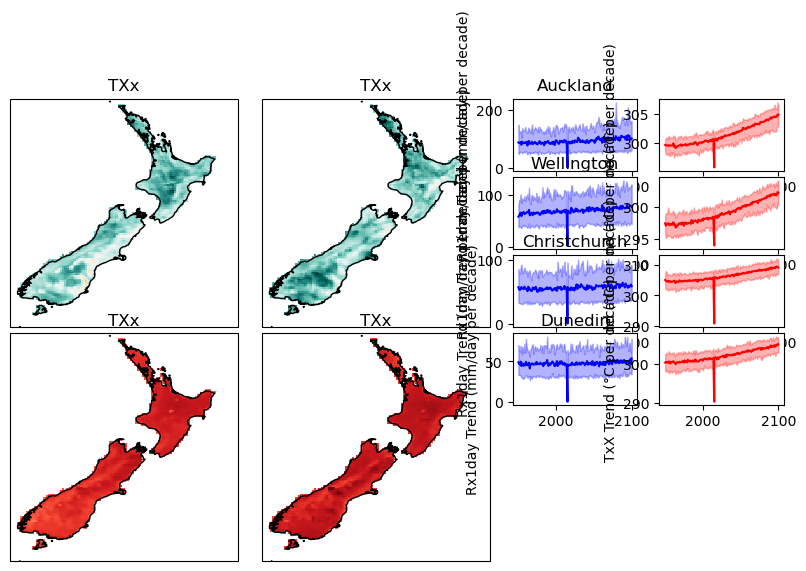

In [410]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load data (replace with actual file path)
# ds = xr.open_dataset("your_data.nc")

# Example city coordinates in NZ (lat, lon)
cities = {
    "Auckland": (-36.85, 174.76),
    "Wellington": (-41.28, 174.77),
    "Christchurch": (-43.53, 172.63),
    "Dunedin": (-45.87, 170.50)
}

# Create figure and axes
fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(12, 6, width_ratios=[1, 1, 1, 1, 1.2, 1.2])

# Define dataset (replace with actual data)
# ds = xr.open_dataset("your_data.nc")
# For demonstration, using a placeholder
# ds = All_merged

# Projection for map inset
map_proj = ccrs.PlateCarree()

# Plot Rx1day and TXx maps

ax = fig.add_subplot(gs[0:6, 0:2], projection=map_proj)
ax.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
plot_data = np.random.randn(100, 100)  # Placeholder for random data
im = cc_signal_pr_ai.where(static_fields.orog >0).sel(GCM_variant=~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_ai.GCM == 'CanESM5'))).mean(["GCM_variant"]).plot(ax=ax, transform = ccrs.PlateCarree(), cmap ='BrBG', add_colorbar=False)
#plt.colorbar(im, ax=ax, orientation="vertical", label=var)
ax.set_title(var)


ax = fig.add_subplot(gs[6:, 0:2], projection=map_proj)
ax.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
plot_data = np.random.randn(100, 100)  # Placeholder for random data
im = cc_signal_tasmax_ai.where(static_fields.orog >0).sel(GCM_variant=~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_ai.GCM == 'CanESM5'))).mean(["GCM_variant"]).plot(ax=ax, transform = ccrs.PlateCarree(), cmap ='Reds', vmin =0, vmax =5, add_colorbar=False)
#plt.colorbar(im, ax=ax, orientation="vertical", label=var)
ax.set_title(var)



ax = fig.add_subplot(gs[0:6, 2:4], projection=map_proj)
ax.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
plot_data = np.random.randn(100, 100)  # Placeholder for random data
im = cc_signal_pr.where(static_fields.orog >0).mean(["GCM"]).plot(ax=ax, transform = ccrs.PlateCarree(), cmap ='BrBG', add_colorbar=False)
#plt.colorbar(im, ax=ax, orientation="vertical", label=var)
ax.set_title(var)


ax = fig.add_subplot(gs[6:, 2:4], projection=map_proj)
ax.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color="lightgray")
# plot_data = ds[var].mean("time")  # Replace with actual data variable
plot_data = np.random.randn(100, 100)  # Placeholder for random data
im = cc_signal_tasmax.where(static_fields.orog >0).mean(["GCM"]).plot(ax=ax, transform = ccrs.PlateCarree(), cmap ='Reds', vmin =0, vmax =5, add_colorbar=False)
#plt.colorbar(im, ax=ax, orientation="vertical", label=var)
ax.set_title(var)

# Plot Rx1day trend for Auckland
ds = All_merged
for i, (city, (lat, lon)) in enumerate(cities.items()):
    ax_trend_pr = fig.add_subplot(gs[2*i:2*i+2, 4:5])
    ax_trend_tasmax = fig.add_subplot(gs[2*i:2*i+2, 5:6])
    # Extract time series at each location
    ai_trend = ds["Rx1day"].sel(lat=lat, lon=lon, method="nearest").mean("GCM_variant")
    ai_range = ds["Rx1day"].sel(lat=lat, lon=lon, method="nearest").quantile([0.1, 0.9], dim="GCM_variant")

    dyn_trend = ds["TXx"].sel(lat=lat, lon=lon, method="nearest").mean("GCM_variant")
    dyn_range = ds["TXx"].sel(lat=lat, lon=lon, method="nearest").quantile([0.1, 0.9], dim="GCM_variant")

    years = ds["year"]

    # Left column: AI trends
    ax1 = ax_trend_pr
    ax1.plot(years, ai_trend, label="AI Mean", color="blue")
    ax1.fill_between(years, ai_range.isel(quantile=0), ai_range.isel(quantile=1), color="blue", alpha=0.3)
    ax1.set_title(city)
    ax1.set_ylabel("Rx1day Trend (mm/day per decade)")
    
    # Right column: Dynamical Downscaling trends
    ax2 = ax_trend_tasmax
    ax2.plot(years, dyn_trend, label="Dynamical Mean", color="red")
    ax2.fill_between(years, dyn_range.isel(quantile=0), dyn_range.isel(quantile=1), color="red", alpha=0.3)
    ax2.set_ylabel("TxX Trend (°C per decade)")
# Inset map for city locations
# ax_map = fig.add_subplot(gs[:, 1], projection=map_proj)
# ax_map.set_extent([166, 180, -48, -34], crs=ccrs.PlateCarree())
# ax_map.add_feature(cfeature.COASTLINE, linewidth=1)
# ax_map.add_feature(cfeature.BORDERS, linestyle=':')
# ax_map.add_feature(cfeature.LAND, color="lightgray")
# for city, (lat, lon) in cities.items():
#     ax_map.scatter(lon, lat, color="black", s=50, transform=ccrs.PlateCarree())
# ax_map.set_title("City Locations")

plt.tight_layout()
plt.show()


In [429]:
ds["Rx1day"].sel(lat=lat, lon=lon, method="nearest").dropna("year")

<xarray.DataArray 'Rx1day' (GCM_variant: 77, year: 149)>
array([[31.39970016, 66.03372955, 64.56230927, ..., 37.14768982,
        66.57572174, 53.05992508],
       [41.97180939, 48.18846512, 49.15186691, ..., 54.62625885,
        49.92541885, 39.242836  ],
       [78.9606781 , 62.53781128, 18.69964981, ..., 46.44587326,
        52.11006927, 41.54915237],
       ...,
       [46.1802063 , 61.98899841, 25.64935875, ..., 69.26394653,
        38.25596237, 53.77513123],
       [42.2946701 , 33.65933228, 43.09598923, ..., 73.1257019 ,
        46.13376617, 63.07172394],
       [41.43410873, 26.73974991, 38.52753067, ..., 39.49177551,
        55.98361206, 47.47429657]])
Coordinates:
  * GCM_variant  (GCM_variant) <U25 'ACCESS-CM2_r4i1p1f1' ... 'UKESM1-0-LL_r1...
  * year         (year) int64 1951 1952 1953 1954 1955 ... 2096 2097 2098 2099
    lon          float32 170.5
    lat          float32 -45.85
    GCM          (GCM_variant) <U16 'ACCESS-CM2' ... 'UKESM1-0-LL'
    scenario     (year) <U10 'historical' 'historical' ... 'ssp370' 'ssp370'

In [438]:
ds["Rx1day"].sel(lat=lat, lon=lon, method="nearest").year

<xarray.DataArray 'year' (year: 152)>
array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044,
       2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056,
       2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068,
       2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
       2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092,
       2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100])
Coordinates:
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100
    lon       float32 170.5
    lat       float32 -45.85
    scenario  (year) <U10 'historical' 'historical' ... 'ssp370' 'ssp370'

In [430]:
ai_trend = ds["Rx1day"].sel(lat=lat, lon=lon, method="nearest").dropna("year").mean("GCM_variant")

In [453]:
ai_trend = ds["Rx1day"].sel(lat=lat, lon=lon, method="nearest").dropna("year")

In [461]:
ccam_trend = All_merged_CCAM["Rx1day"].sel(lat=lat, lon=lon, method="nearest").dropna("year")

In [448]:
lat =-39
lon =176

/nesi/project/niwa00018/rampaln/envs/ml_env_v2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


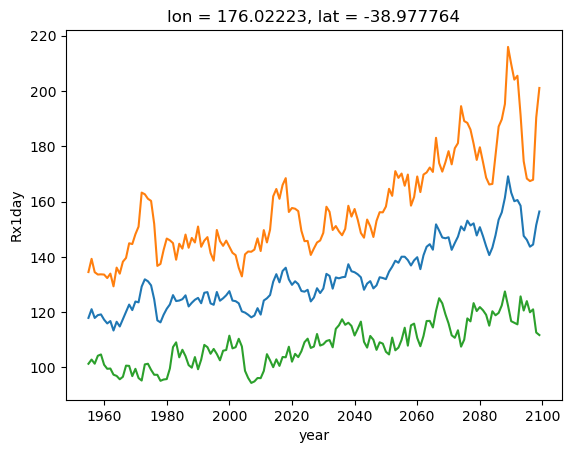

In [471]:
ai_trend.rolling(year =5, min_periods =5).mean().sel(GCM_variant = ~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_ai.GCM == 'CanESM5'))).mean("GCM_variant").plot()
z1 = ai_trend.rolling(year =5, min_periods =5).mean().sel(GCM_variant = ~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_ai.GCM == 'CanESM5'))).std("GCM_variant")#.plot()
(ai_trend.rolling(year =5, min_periods =5).mean().sel(GCM_variant = ~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_ai.GCM == 'CanESM5'))).mean("GCM_variant") +z1).plot()
(ai_trend.rolling(year =5, min_periods =5).mean().sel(GCM_variant = ~((cc_signal_pr_land_ai.GCM == 'ACCESS-ESM1-5')|(cc_signal_pr_land_ai.GCM == 'CanESM5'))).mean("GCM_variant") -z1).plot()


# ccam_trend.rolling(year =15, min_periods =5).mean().mean("GCM").plot()
# z1 = ccam_trend.rolling(year =15, min_periods =5).mean().std("GCM")#.plot()
# (ccam_trend.rolling(year =15, min_periods =5).mean().mean("GCM") +z1).plot()
# (ccam_trend.rolling(year =15, min_periods =5).mean().mean("GCM") -z1).plot()

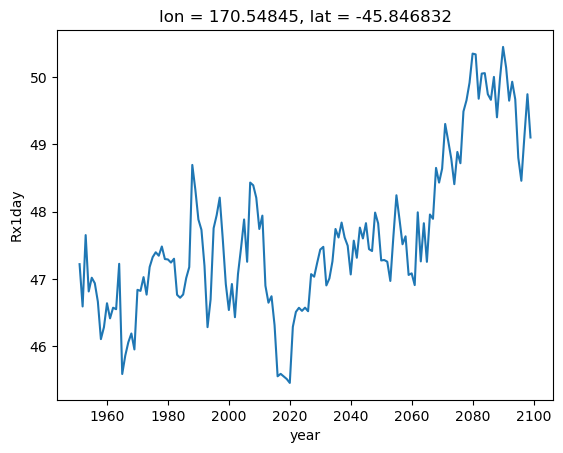

In [434]:
ai_trend.rolling(year =5, min_periods =1).mean().plot()

In [351]:
import cartopy.crs as ccrs

ERROR 1: PROJ: proj_create_from_database: Open of /nesi/project/niwa00018/rampaln/envs/ml_env_v2/share/proj failed


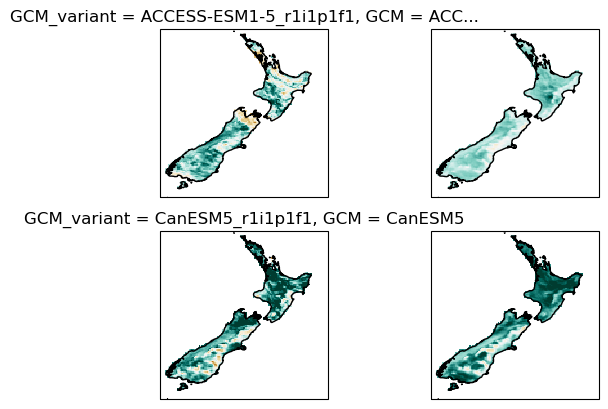

In [366]:
fig, ax = plt.subplots(2,2, subplot_kw = dict(projection = ccrs.PlateCarree(central_longitude =171.77)), sharex =True, sharey =True)
cc_signal_pr_ai.where(static_fields.orog >0).sel(GCM_variant ='ACCESS-ESM1-5_r1i1p1f1').plot(ax = ax[0,0], vmin =-40, vmax =40, transform = ccrs.PlateCarree(), cmap ='BrBG', add_colorbar = False)
cc_signal_pr_ai.where(static_fields.orog >0).sel(GCM_variant =cc_signal_pr_ai.GCM =='ACCESS-ESM1-5').mean("GCM_variant").plot(ax = ax[0,1], vmin =-40, vmax =40, transform = ccrs.PlateCarree(), cmap ='BrBG', add_colorbar = False)
cc_signal_pr_ai.where(static_fields.orog >0).sel(GCM_variant ='CanESM5_r1i1p1f1').plot(ax = ax[1,0], vmin =-40, vmax =40, transform = ccrs.PlateCarree(), cmap ='BrBG', add_colorbar = False)
cc_signal_pr_ai.where(static_fields.orog >0).sel(GCM_variant =cc_signal_pr_ai.GCM =='CanESM5').mean("GCM_variant").plot(ax = ax[1,1], vmin =-40, vmax =40, transform = ccrs.PlateCarree(), cmap ='BrBG', add_colorbar = False)
ax[0,0].set_extent([166, 180, -48, -34], crs = ccrs.PlateCarree())
ax[0,0].coastlines('10m')
ax[1,0].coastlines('10m')
ax[0,1].coastlines('10m')
ax[1,1].coastlines('10m')